# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 로드

In [1]:
import pandas as pd #분석 사용
import numpy as np #수치 계산
import seaborn as sns #시각화 사용
import matplotlib.pyplot as plt # 그래프 시각화

#%matplotlib inline # 구버전의 주피터 노트북에서 설정이 되어야 노트북 안에서 그래프가 시각화 된다

# 한글폰트 설정

In [2]:
# Google colaboratory을 사용할 경우는 ctrl(cmd) + /로 주석을 없애서 실행을 합니다.



# Jupyter notebook을 사용할 떄는 다음과 같이 코드를 작성합니다.

# 마이너스 폰트가 깨지는 문제를 대처하기 위해 아래 코드를 작성합니다.



In [3]:
import os
# 윈도우, 맥 외의 os는 별도로 설정

if os.name == 'posix' :
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
    # 마이너스 폰트 깨지는 문제 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정시 글씨가 좀 더 선명하게 보인다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지한다.
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
- 국민건강보험 데이터를 사용하겠습니다. 공공데이터포털에서 건강검진정보를 다운로드 받습니다.
우리가 엑셀도 좋지만 파이썬으로 데이터 분석을 배우는 이유는 대용량 데이터를 분석하기 위함입니다.
2018년 데이터는 utf-8로 되어 있고, 2017년 데이터는 한글 인코딩이 되어 있습니다. 2017년 데이터를 사용합니다.

In [5]:
df=pd.read_csv("data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.shape

(1000000, 34)

## 데이터 미리보기

In [7]:
# sample, head, tail 통해 데이터 미리보기
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [8]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [9]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1931,2017,1932,1,10,43,165.0,80.0,92.0,1.2,1.0,...,104.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


# 기본정보 보기

In [10]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [11]:
# 컬럼의 수가 많다. 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [12]:
# dtypes를 통해 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

In [13]:
True == 1

True

In [14]:
True + True + False

2

In [15]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어준다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [16]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계한다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

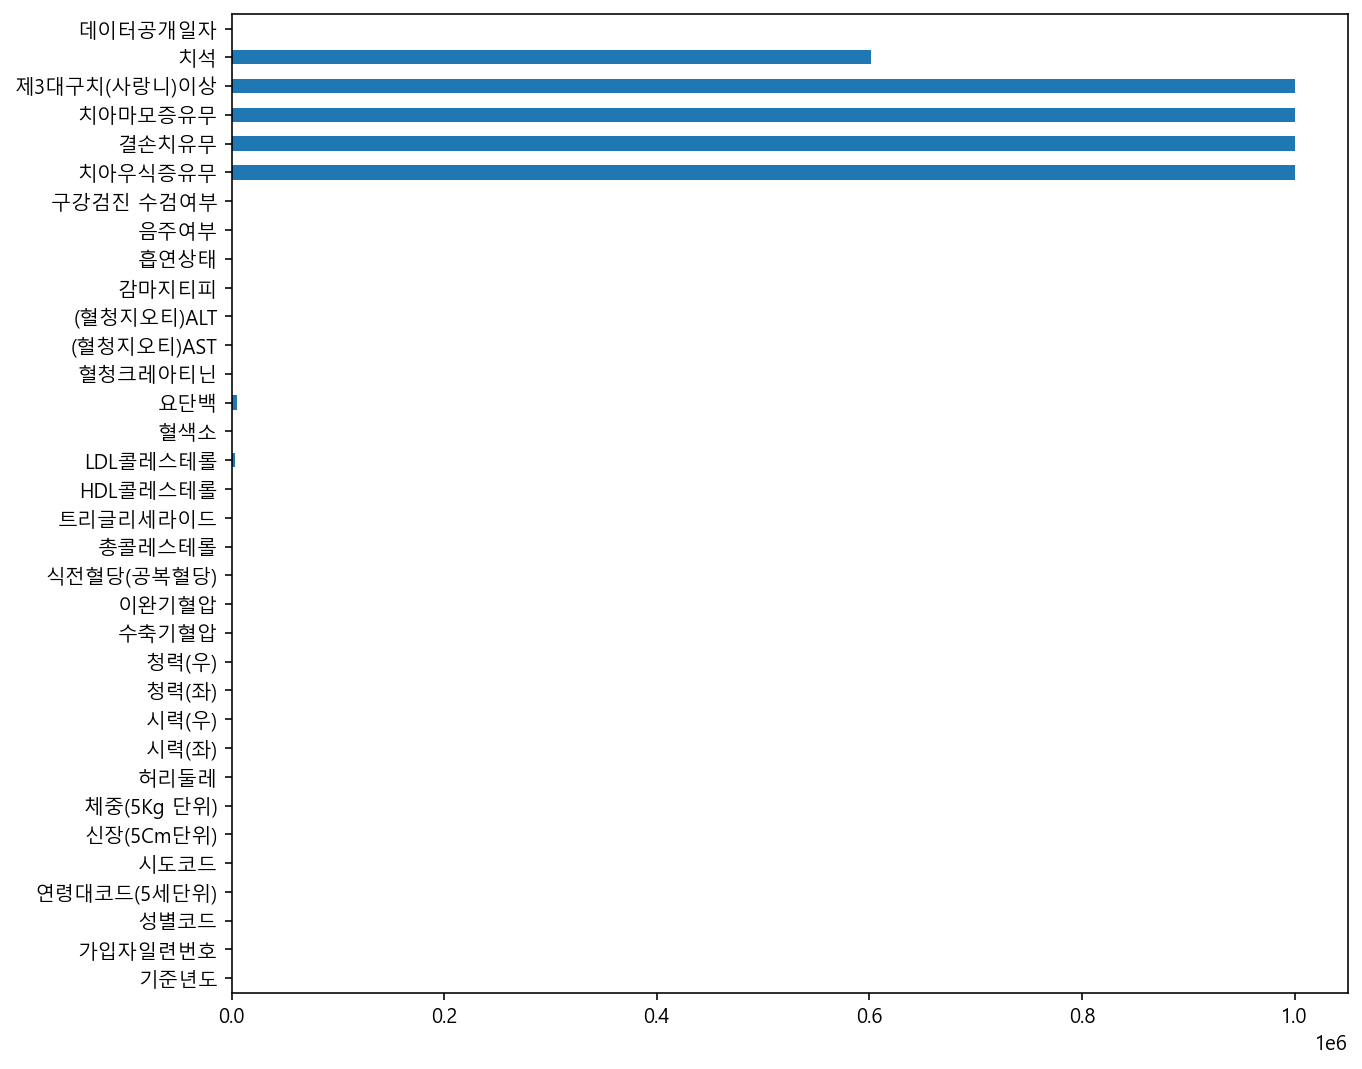

In [17]:
# 판다스에 내장된 plot를 통해 시각화를 한다.
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [18]:
# 여러 컬럼을 가져온다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 한다.
df["(혈청지오티)ALT", "(혈청지오티)AST"]

# 오류가 난다!! 두개 이상의 데이터를 불러 올 때는 리스트 자료 구조로 가져와야 한다.

KeyError: ('(혈청지오티)ALT', '(혈청지오티)AST')

In [19]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [20]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [21]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


# value_counts로 값 집계하기

In [22]:
# 성별코드로 그룹화 하고 갯수 집계하기
df["성별코드"].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [23]:
# 흡연상태로 그룹화 하고 갯수 집계하기
df["흡연상태"].value_counts()
# 1:노흡연 3:흡연자 2:흡연했따가 금연

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용

## groupby

In [24]:
# 성별코드로 그룹화 한 데이터 세어보기
df.groupby?

In [25]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [26]:
# 성별코드와 음주여부로 그룹화 하고 갯수 세기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [27]:
# 성별코드와 음주여부로 그룹화 하고 감마지티피의 평균 구하기

df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [28]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구한다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [29]:
# agg를 사용하면 여러 수치를 함께 구할 수 있다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

## pivot_table

In [30]:

# 음주여부에 따른 그룹화된 수 피봇테이블 구하기
df.pivot_table(index="음주여부")

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017,20181126,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017,20181126,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [31]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")
# mean값이 기본 세팅값이므로 aggfunc로 바꿔주기. 

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [32]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")
# data frame으로 출력된다! 

,가입자일련번호
성별코드,
1,531172
2,468828


In [33]:
# 음주여부에 따른 감마지티피의 평균 구하기

pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [34]:
# 기본값은 평균을 구하지만 aggfunc를 통해 지정이 가능하다.

pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [35]:
# aggfunc에 describe를 사용해 통계요약값을 볼수있다.

pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 전체 데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에 groupby 또는 pivot_table로 연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화해보시길 권장합니다.

- 메모리 용량을 줄이기 위해서 대부분의 수치 데이터로 이루어져 있습니다.

## 히스토그램


array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>],
       [<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>,
        <AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <Ax

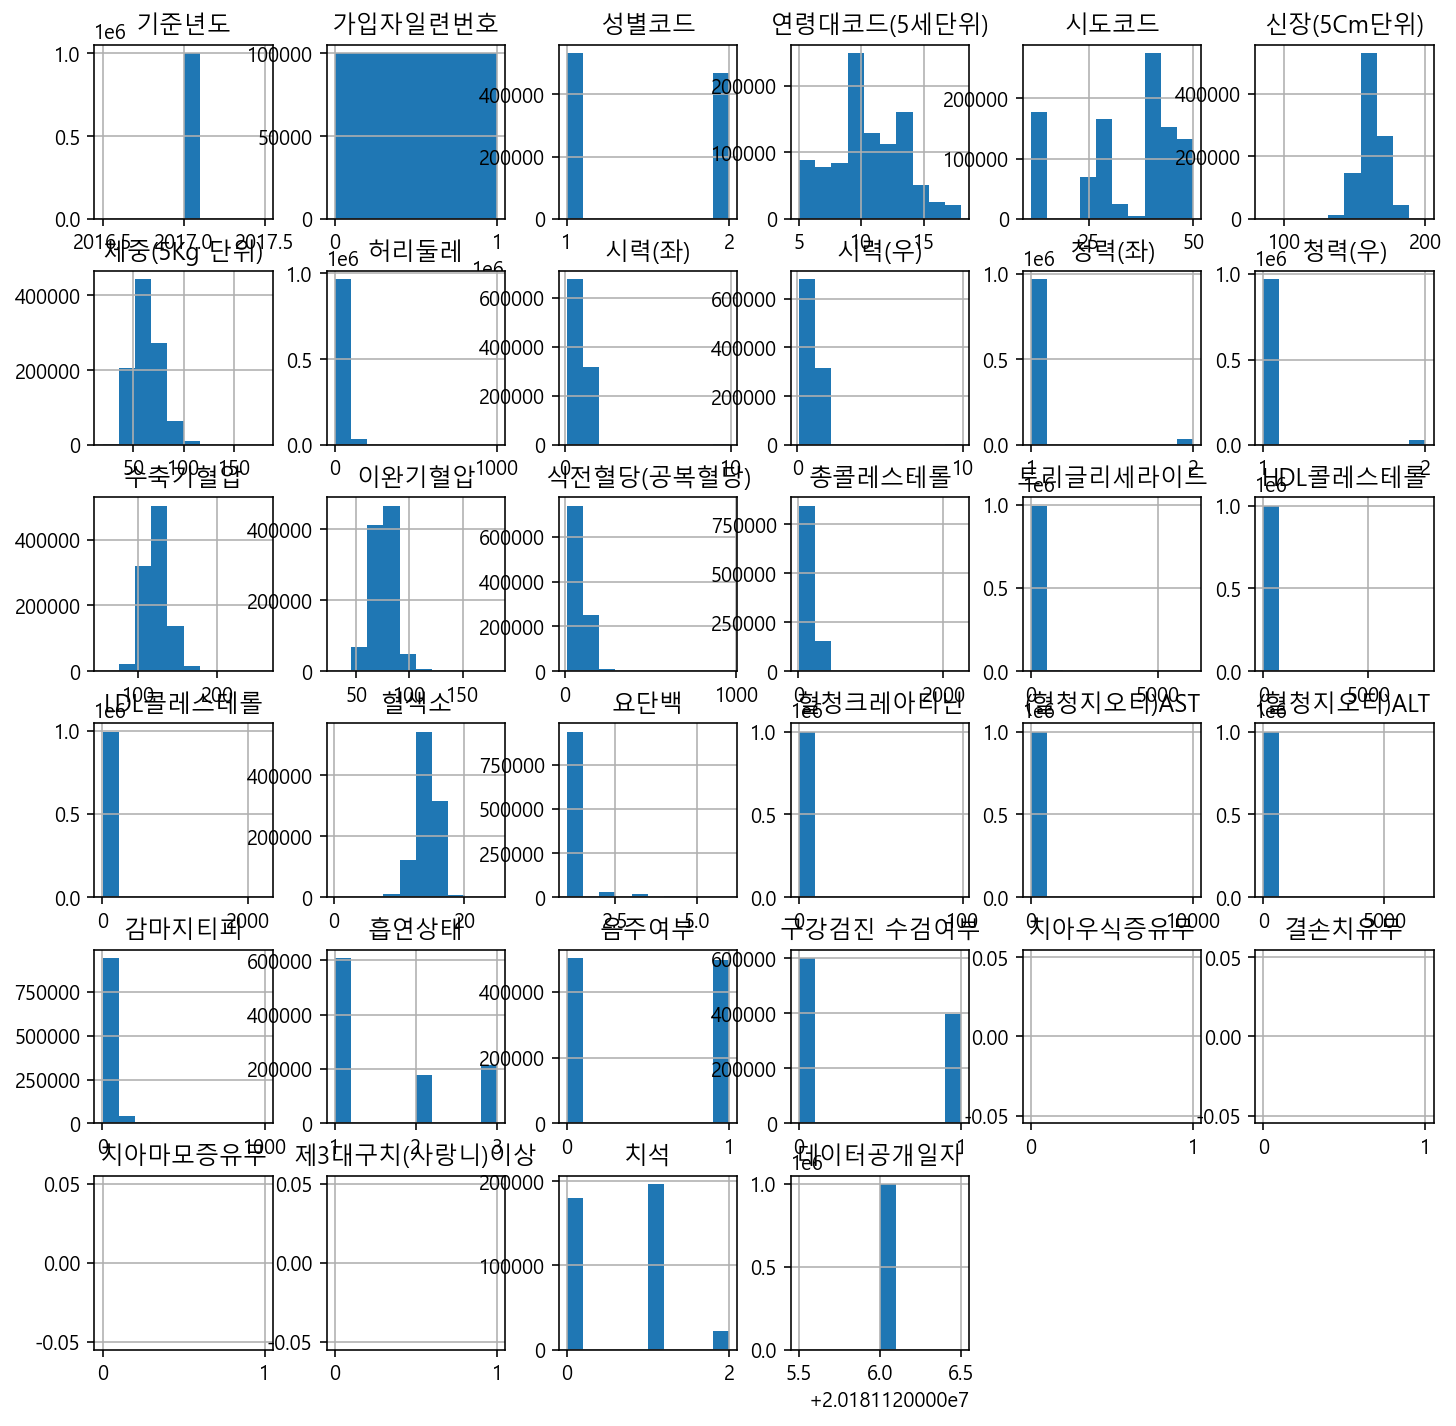

In [36]:
df.hist(figsize=(12,12))

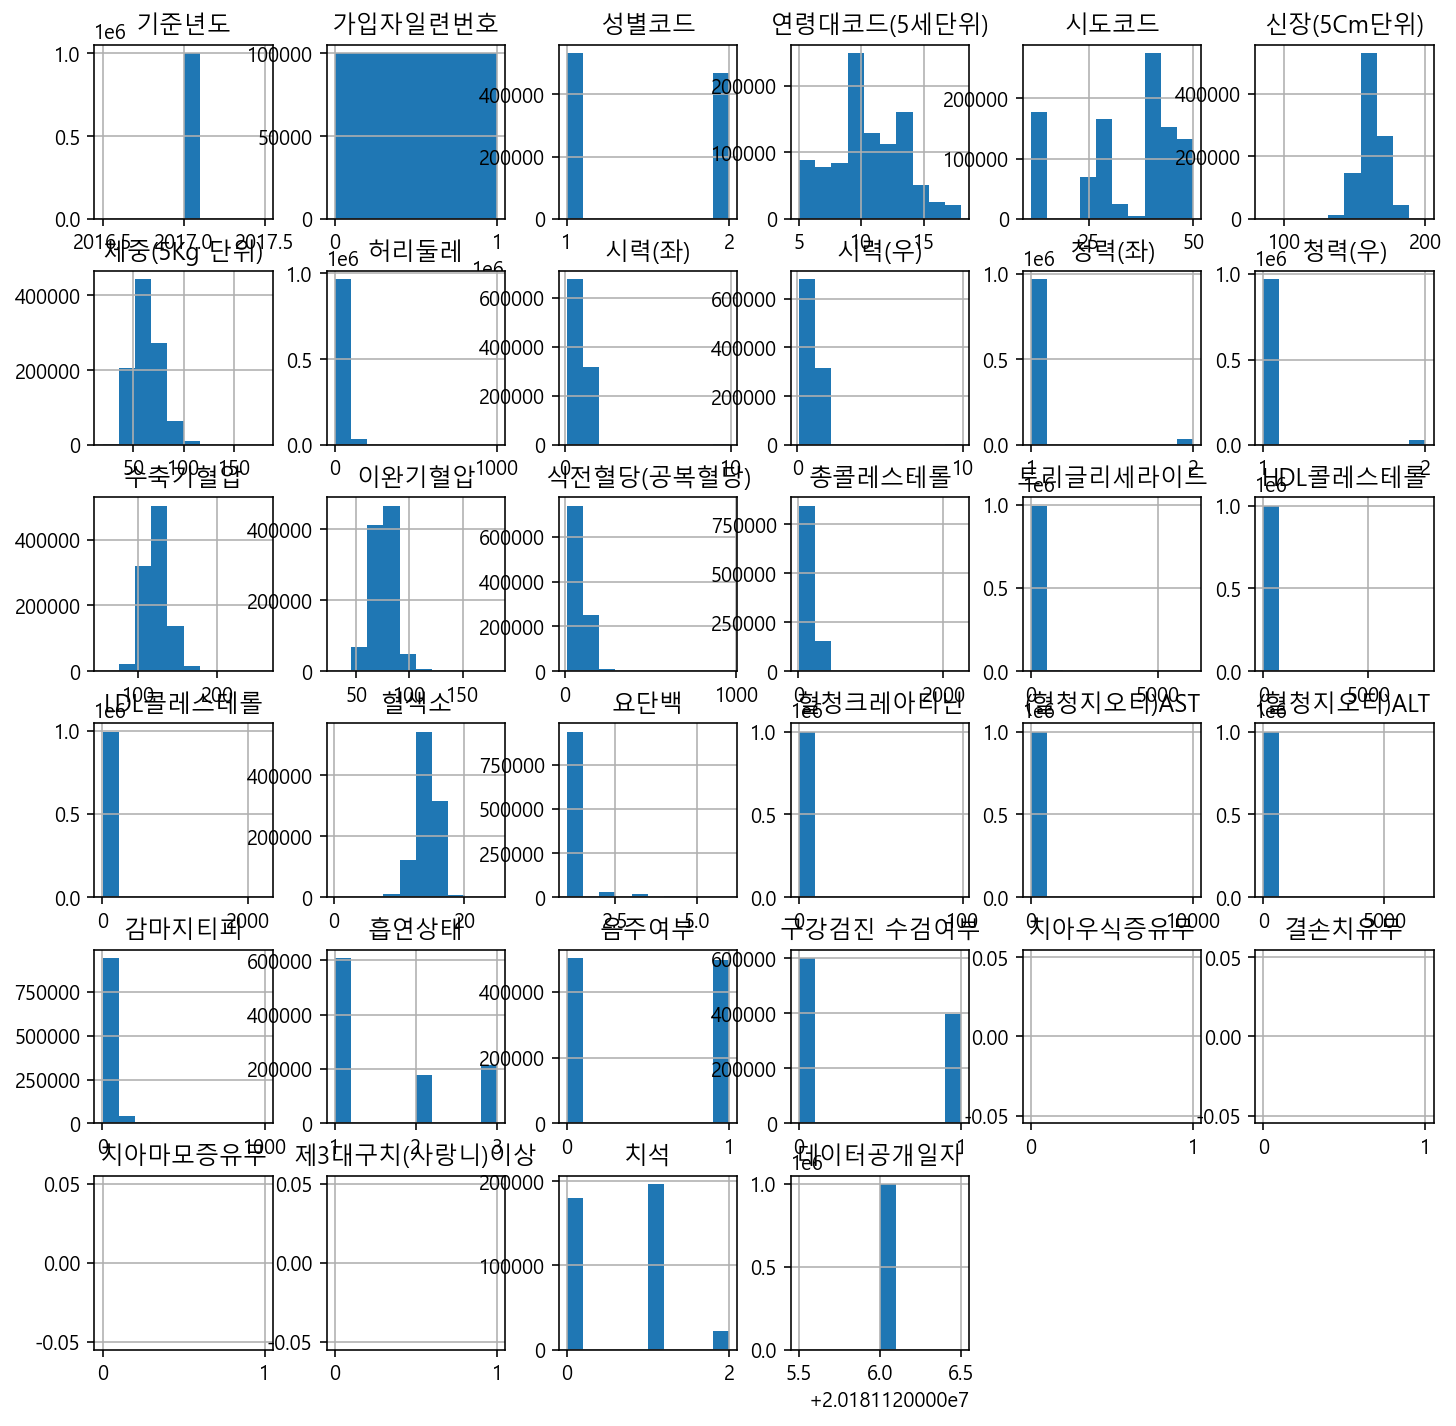

In [37]:
h = df.hist(figsize=(12,12)) 

## 슬라이싱을 사용해 히스토그램 그래기

In [38]:
# [행, 열]
df.iloc[:,:] # 몇번째에 있는 행인지, 컬럼인지 지정 가능
# [:,:] 전체데이터

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>],
       [<AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

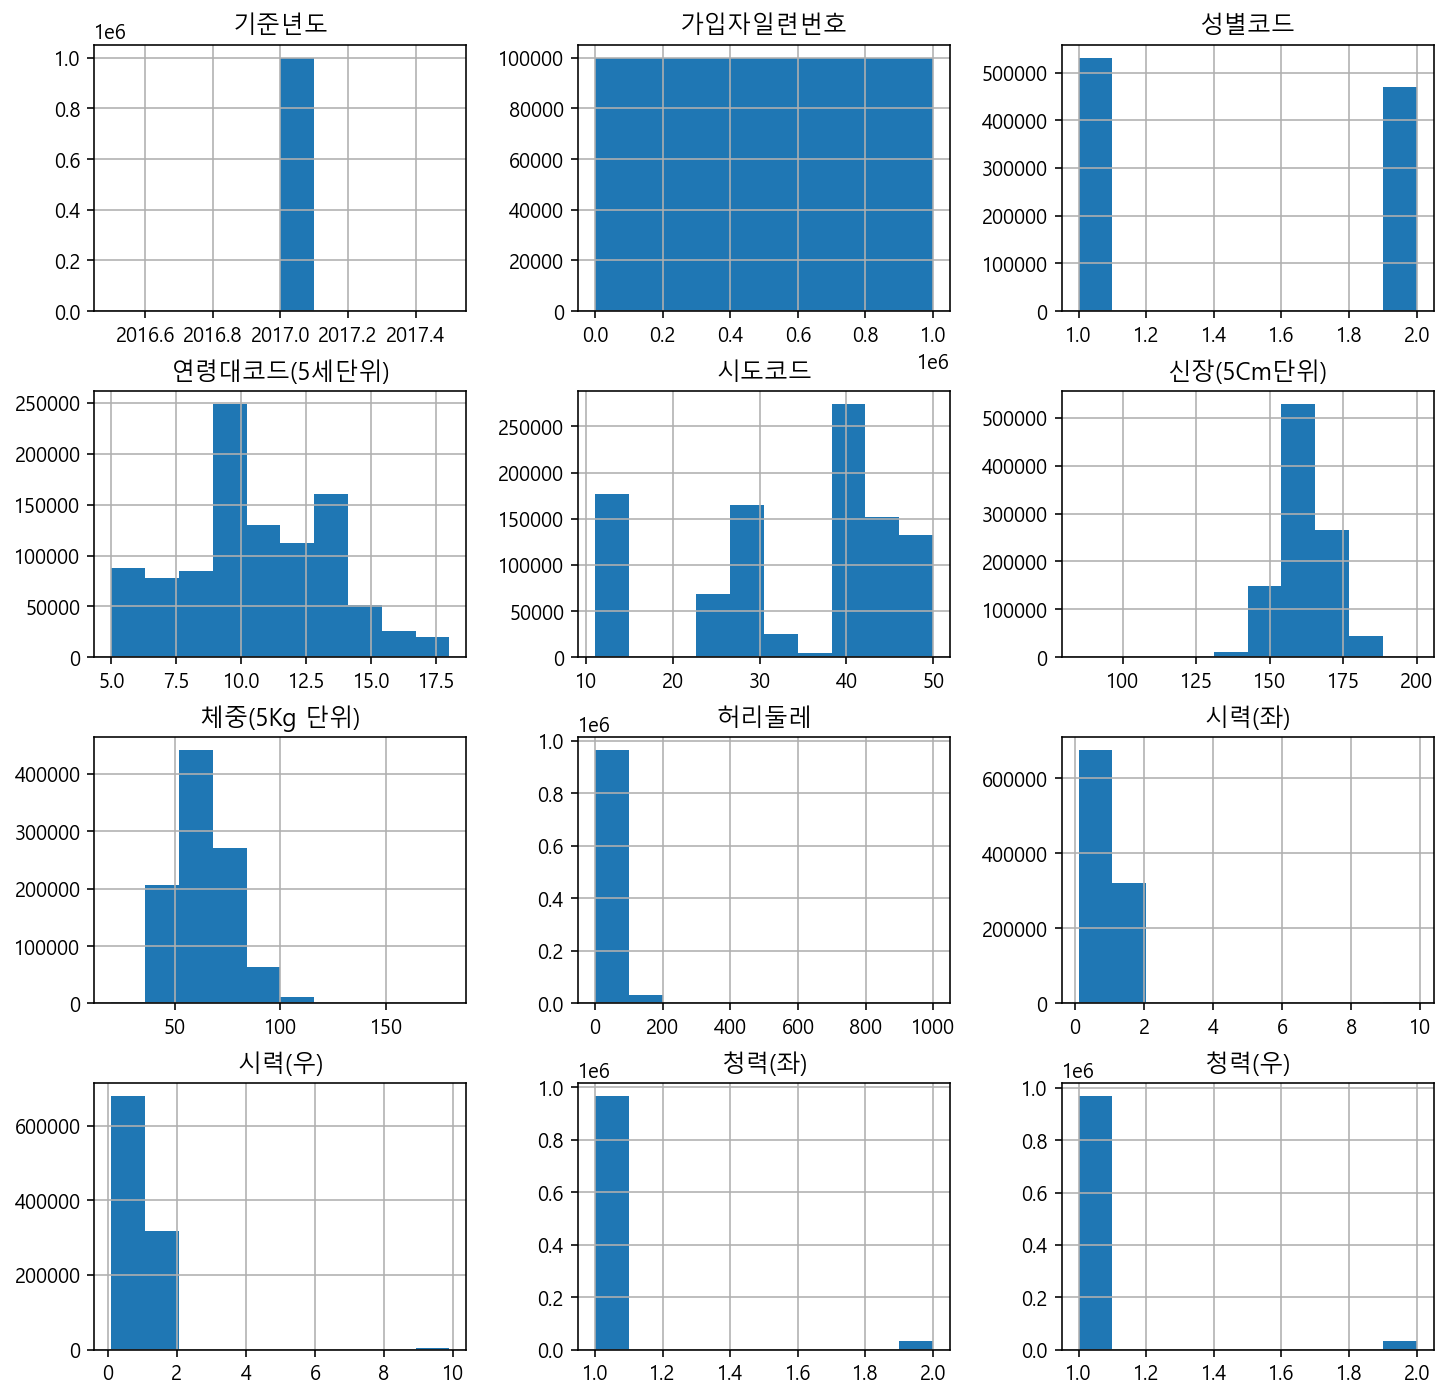

In [39]:
df.iloc[:,:12].hist(figsize=(12,12))

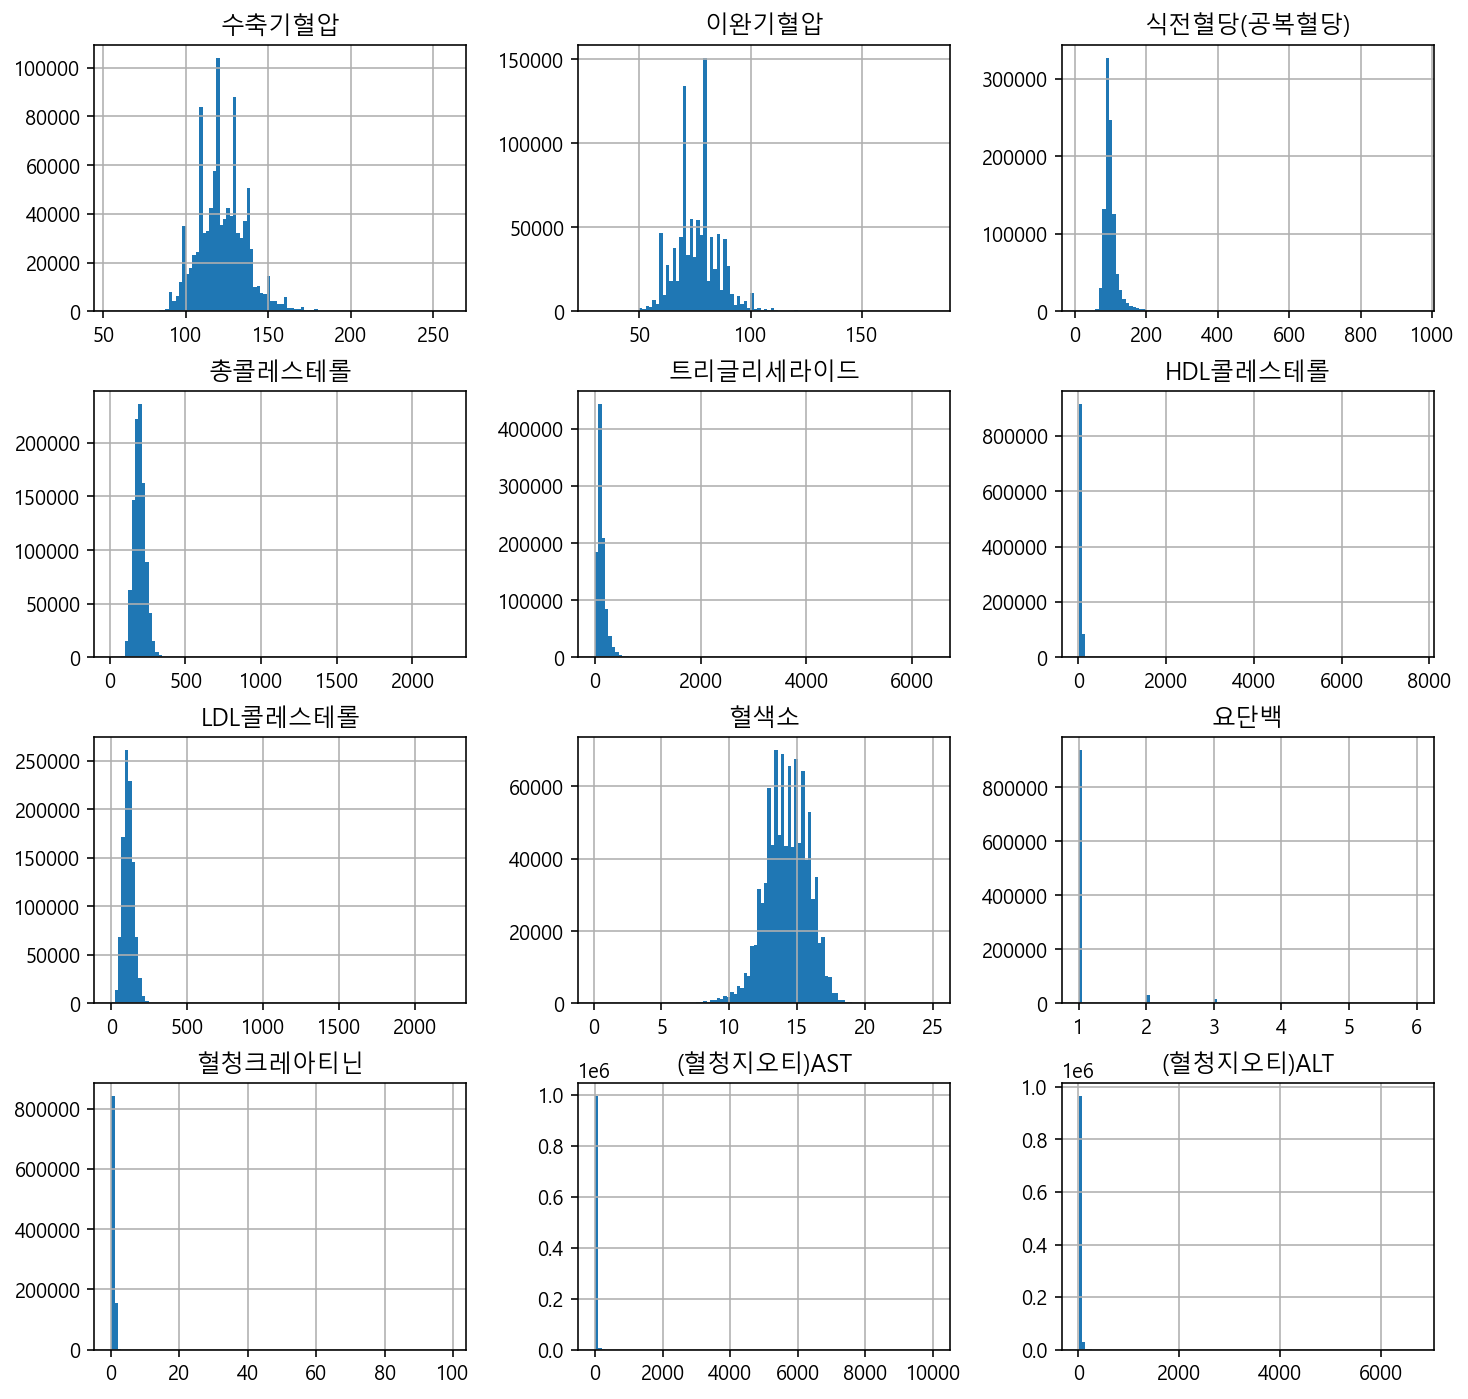

In [40]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번쨰까지 (12:24) 
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)   # bins : 막대 개수를 더 ...  연속된 수치데이터를 카테고리 형태로!!

# 샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적 연산이 되어 데이터가 많으면 속도가 오래걸린다.

In [41]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
876744,2017,876745,2,13,47,150.0,55.0,72.0,0.7,0.5,...,29.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [42]:
df_sample = df.sample(1000,random_state=1) #random_state : 항상 같은 값을 반환한다. df

In [43]:
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 seaborn 사용하기
- https://seaborn.pydata.org/
- seaborn은 https://matplotilb.org/ 사용하기 쉽게 만들어 졌고, 간단하게 고급 통계 연산을 할 수 있다.

# 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
- value_counts 로 구한 값을 시각화

## countplot - 음주여부

<AxesSubplot:>

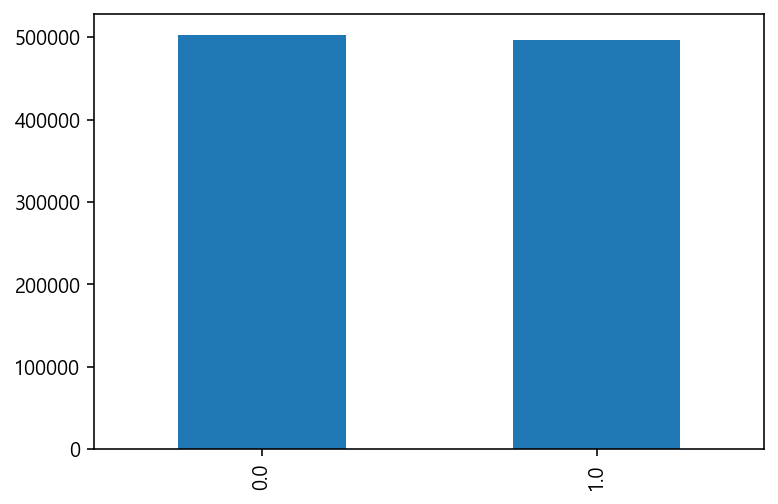

In [44]:
# 음주여부에 따른 countplot을 그린다
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

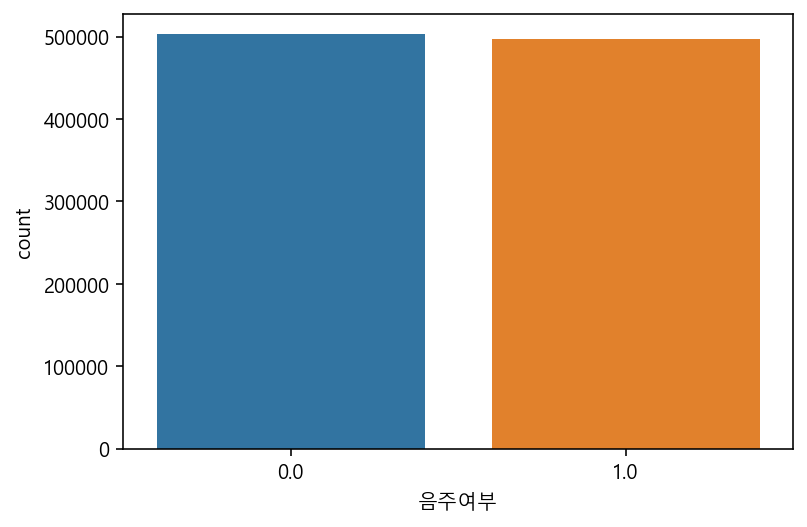

In [45]:
sns.countplot(x="음주여부", data=df)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

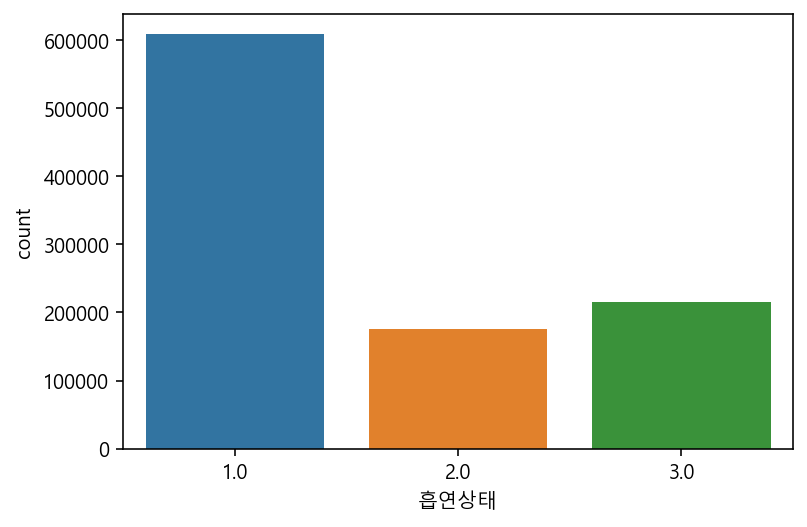

In [46]:
sns.countplot(x="흡연상태", data=df)

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

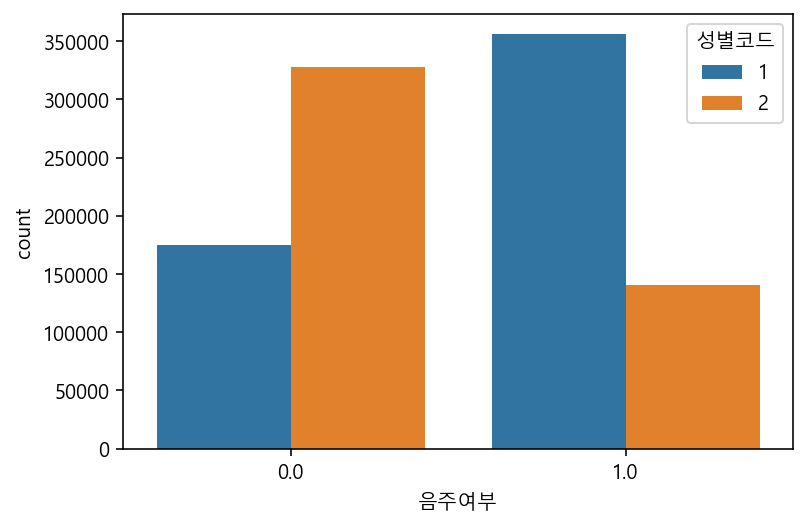

In [47]:
#window
# sns.set(font_scale=1.5, font="Malgun Gothic") 이렇게도 사용 가능

sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

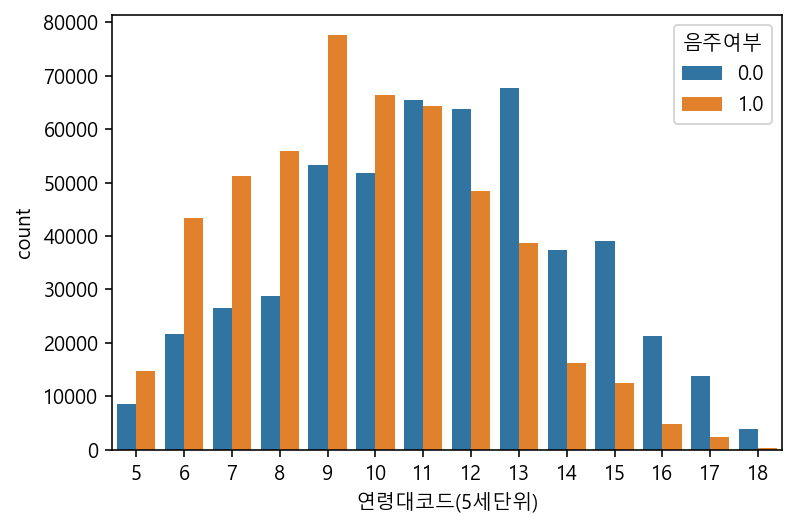

In [48]:

sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부") 

## countplot - 키와 몸무게
 - 키와 몸무게는 연속형 데이터이다.
 - 하지만 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있다.
 - 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 본다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

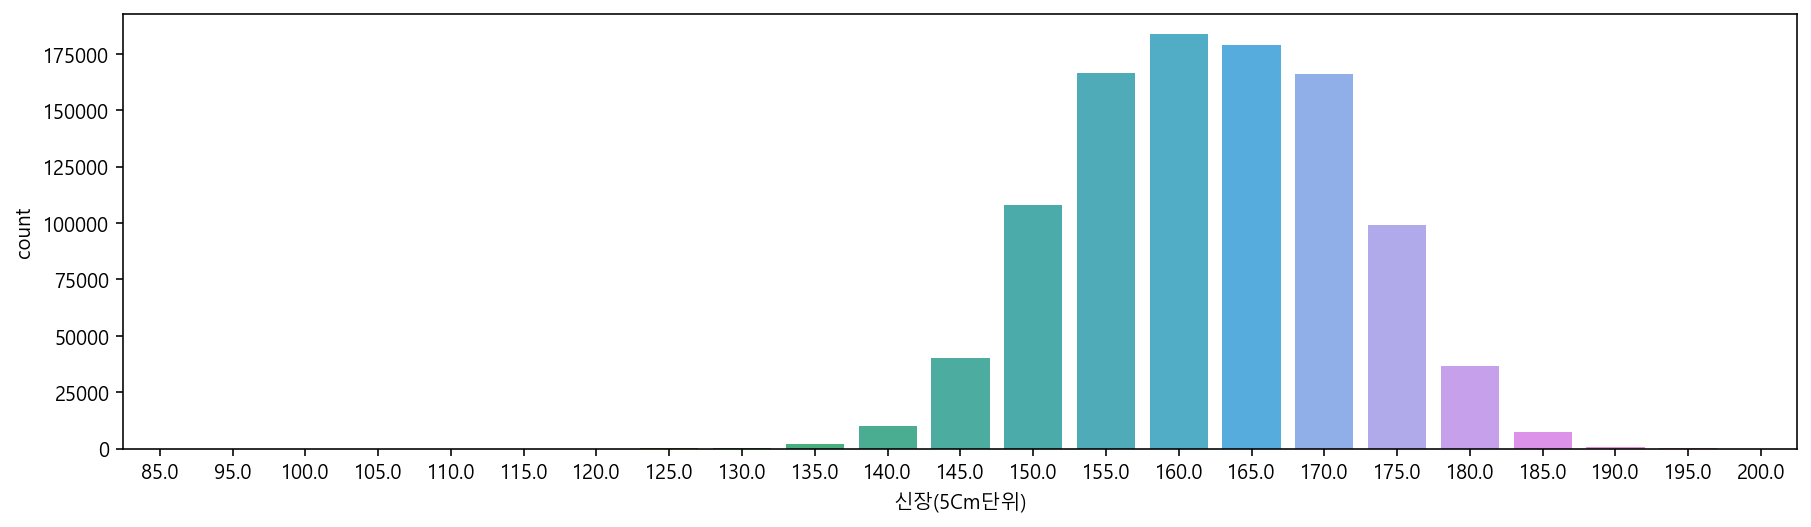

In [49]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

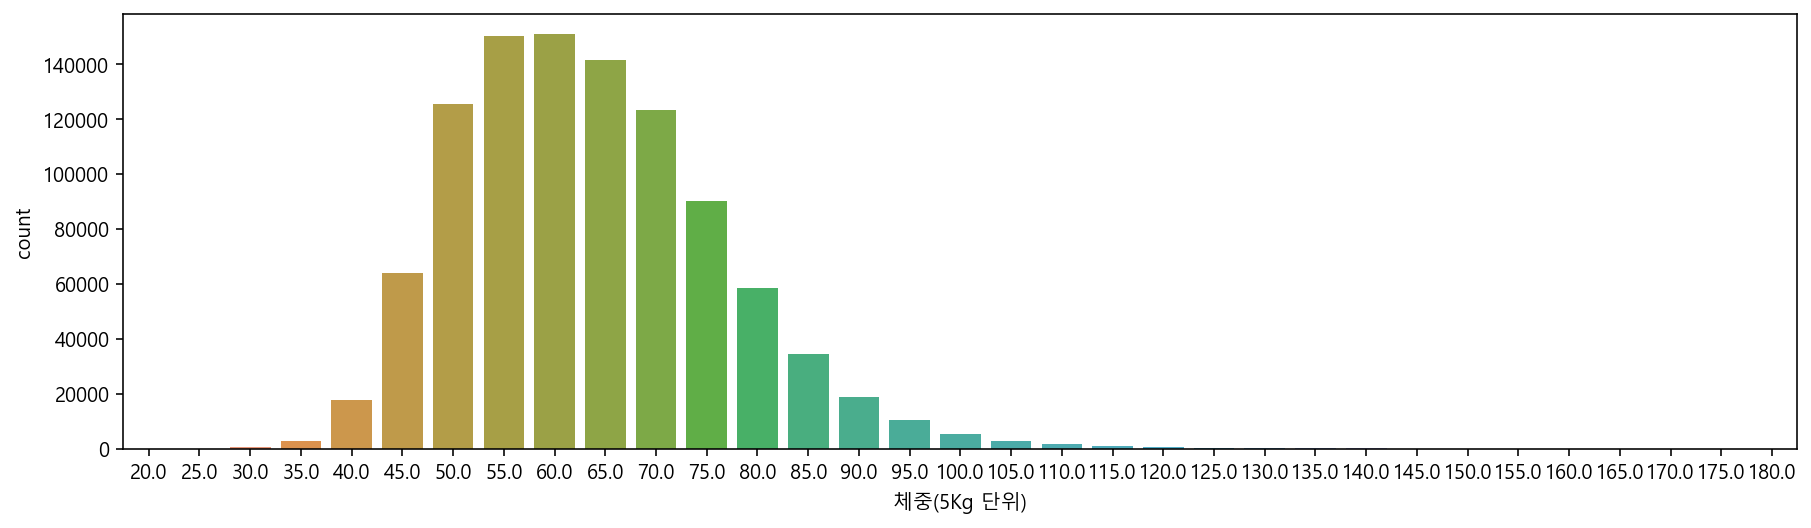

In [50]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

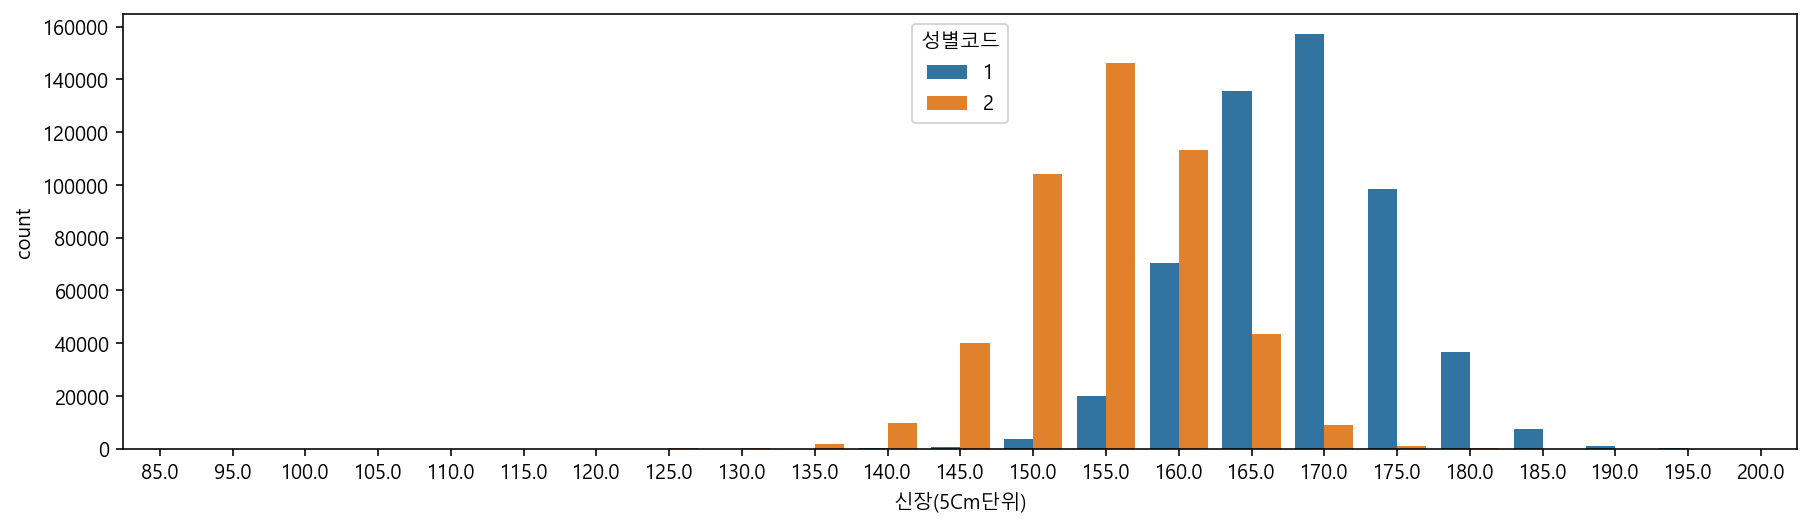

In [51]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

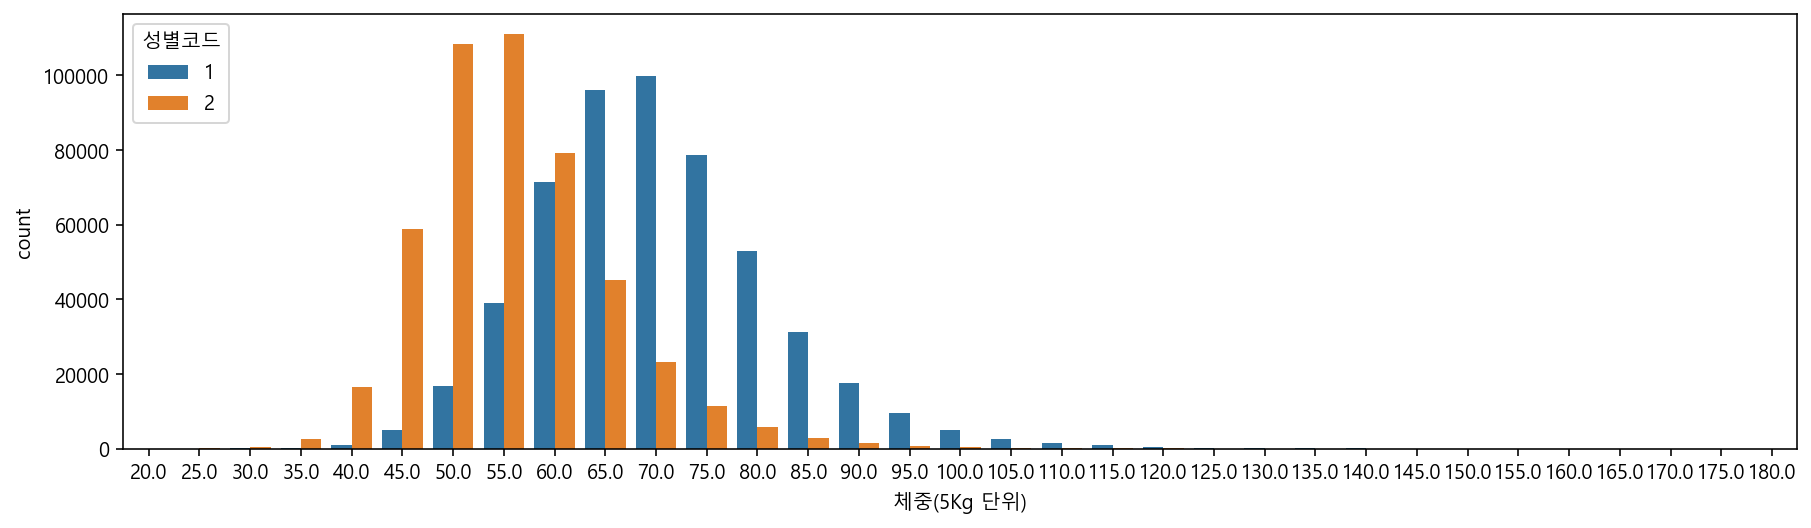

In [52]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

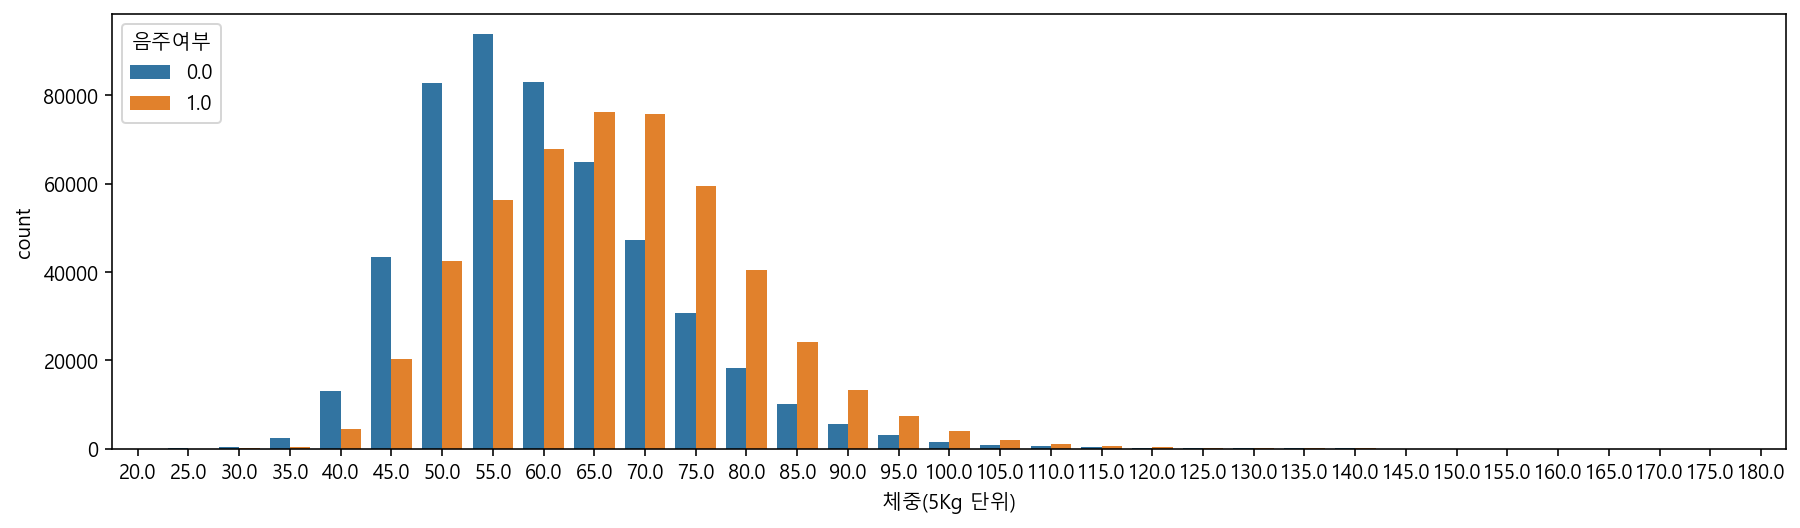

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

## 14. 4 braplot - 수치형 vs 범주형

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

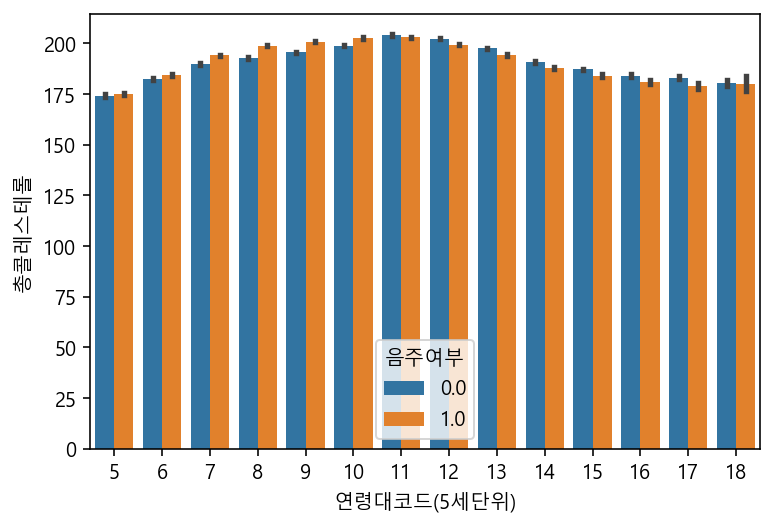

In [54]:
# 연령대코드와 총 콜레스테롤 보기
# hue로 색상 다르게 표현. 음주여부 같이 보기

sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

# 느리다! countplot와 비교했을때 ! 백만개의 데이터가 있는데.. 연령대 코드별로 총 콜레스테롤을 그리긴 했지만. .

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

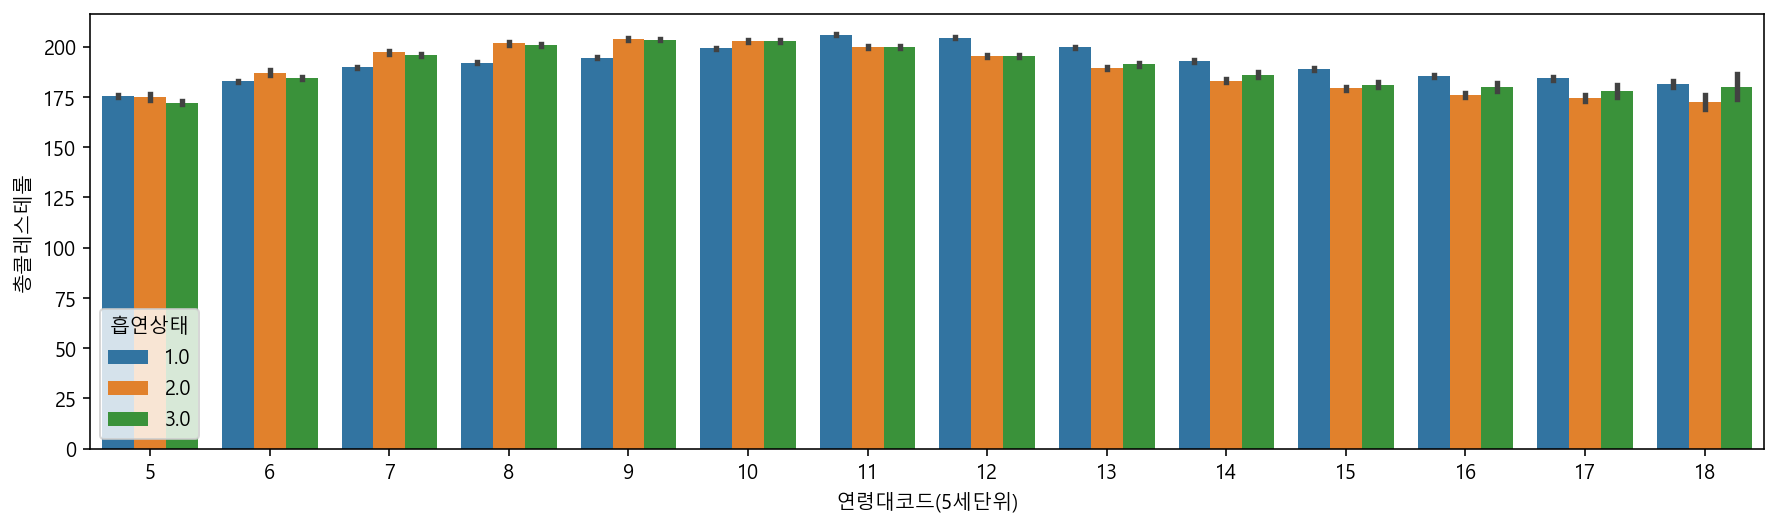

In [55]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

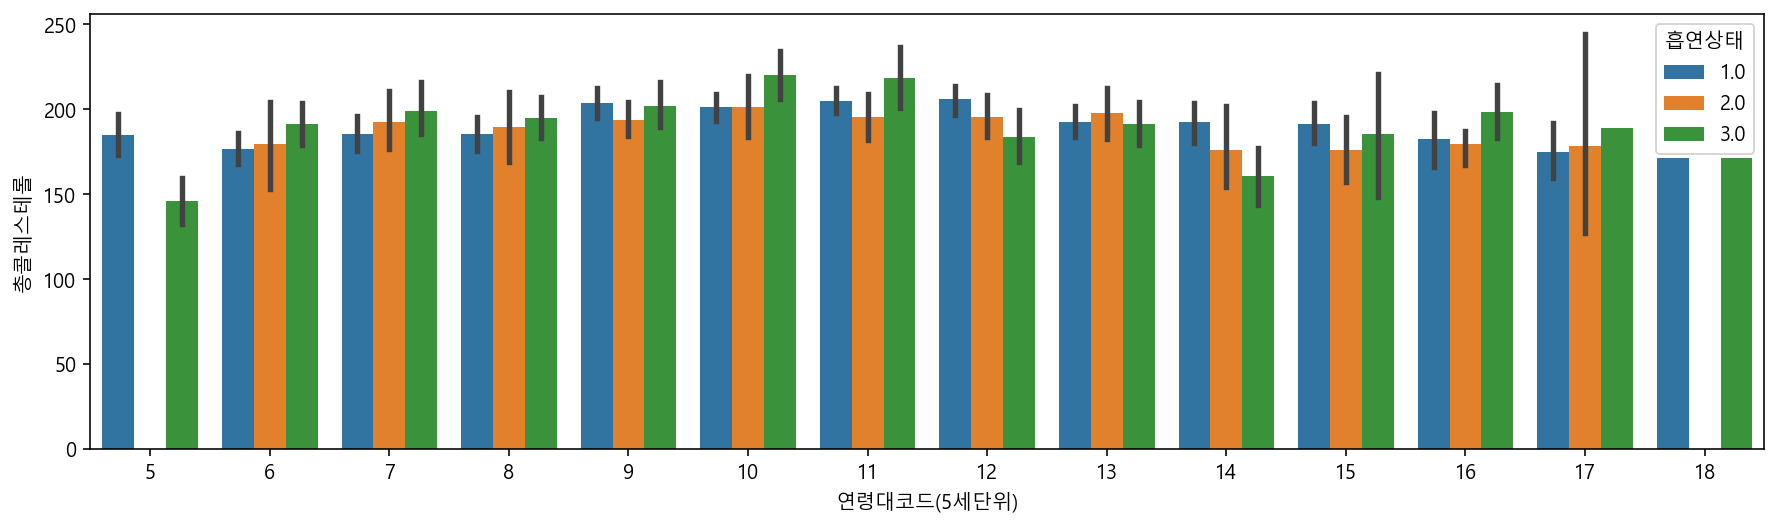

In [56]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

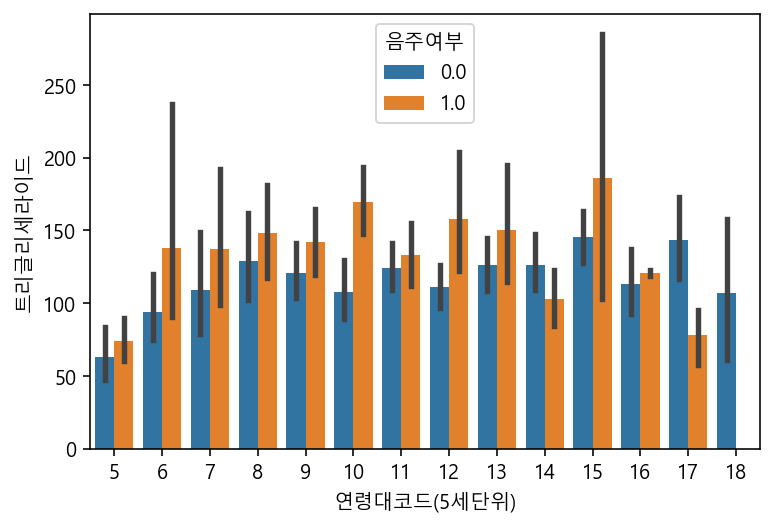

In [57]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot로 그리기
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)

# 검은색 막대: 신뢰구간을 의미 (ci: 95)-> 95%의 신뢰구간을 표시한다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

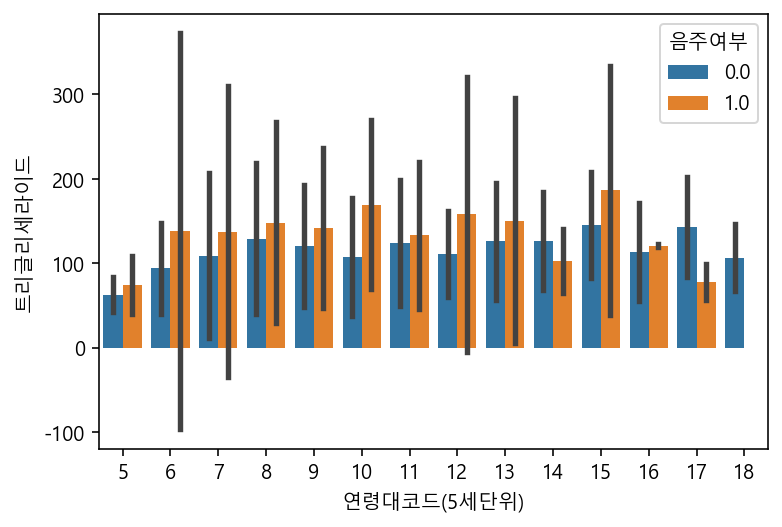

In [58]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd") #sd:표준편차
# sample로 그려서 편차가 커보인다. 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

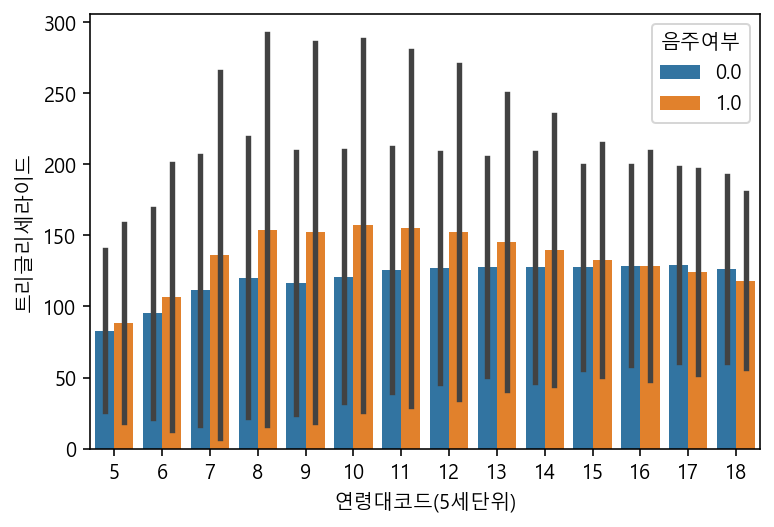

In [59]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd") #sd:표준편차

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

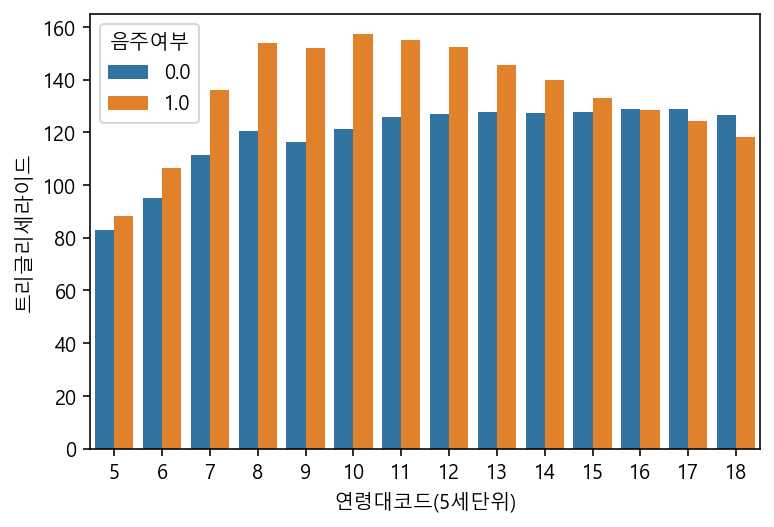

In [60]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None) #sd:표준편차

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

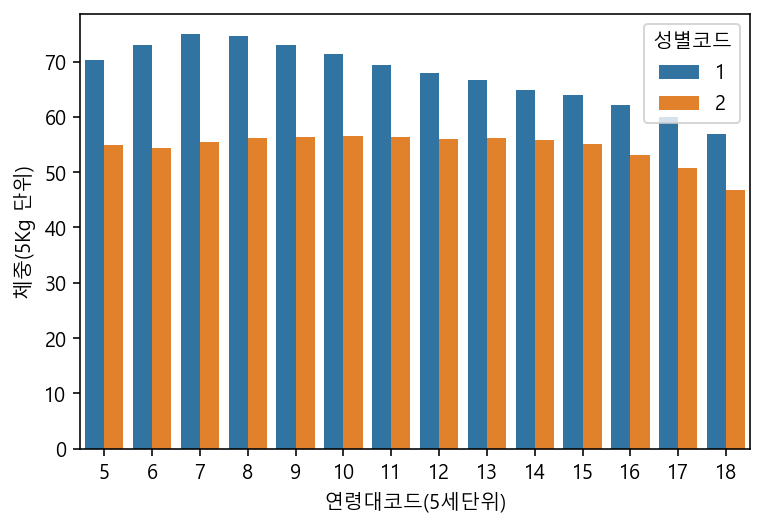

In [61]:
# 연령대코드와 체중(5kg 단위)을 성별에 따라서.
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None) 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

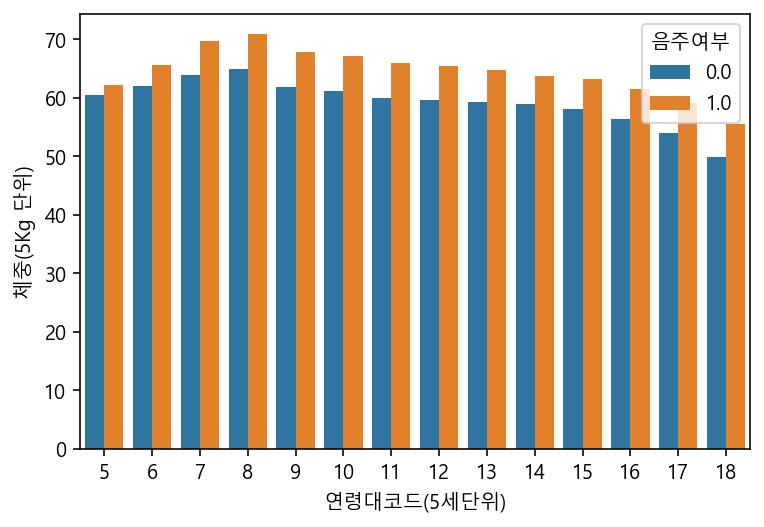

In [62]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

## lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

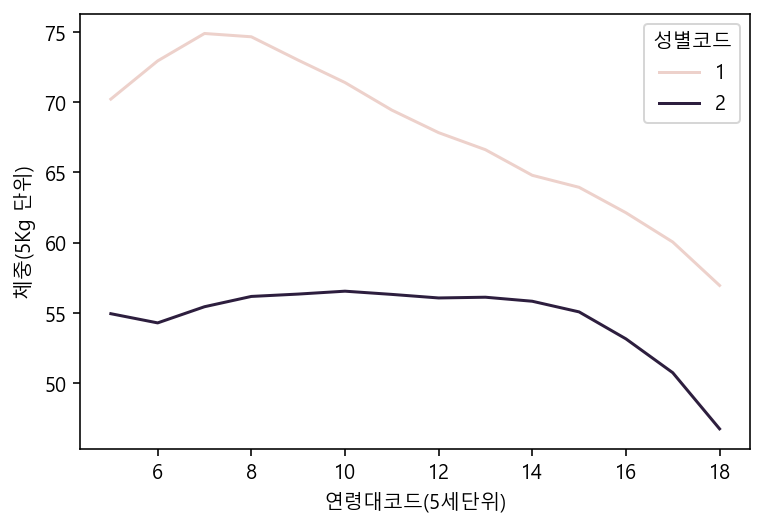

In [63]:
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

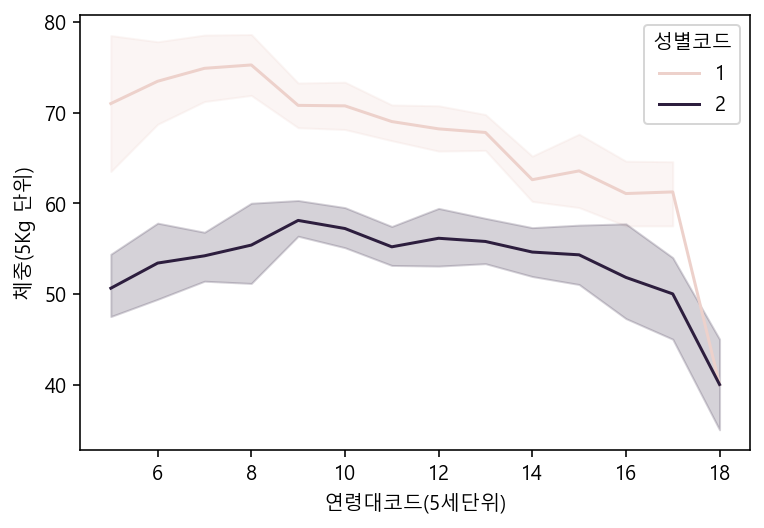

In [64]:
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")
# 그림자로 표시!! 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

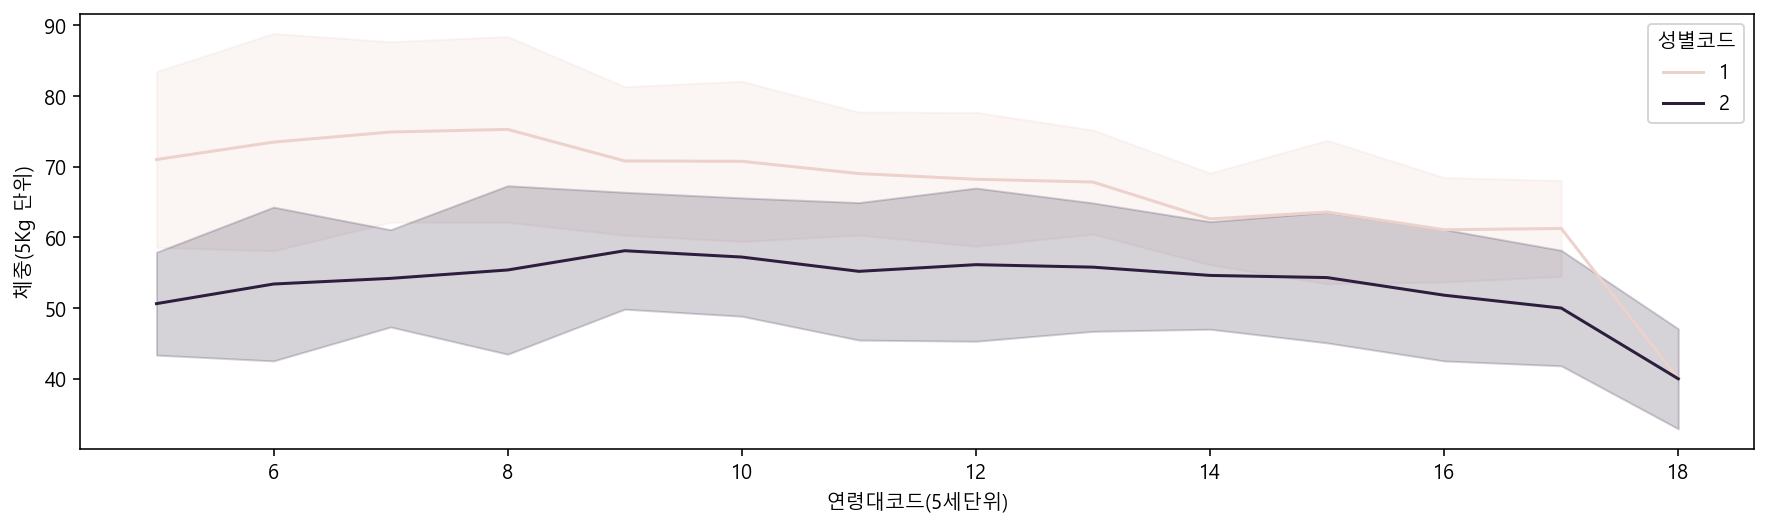

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")
# 그림자로 표시!! 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

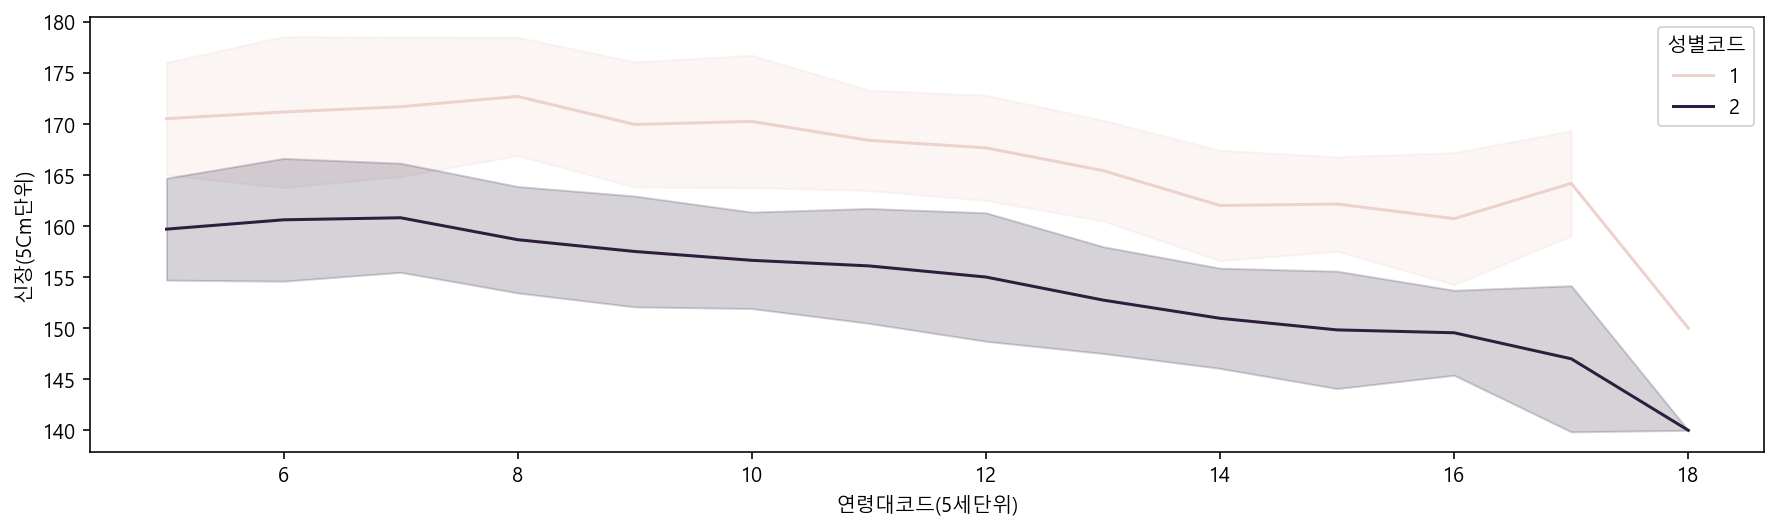

In [66]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

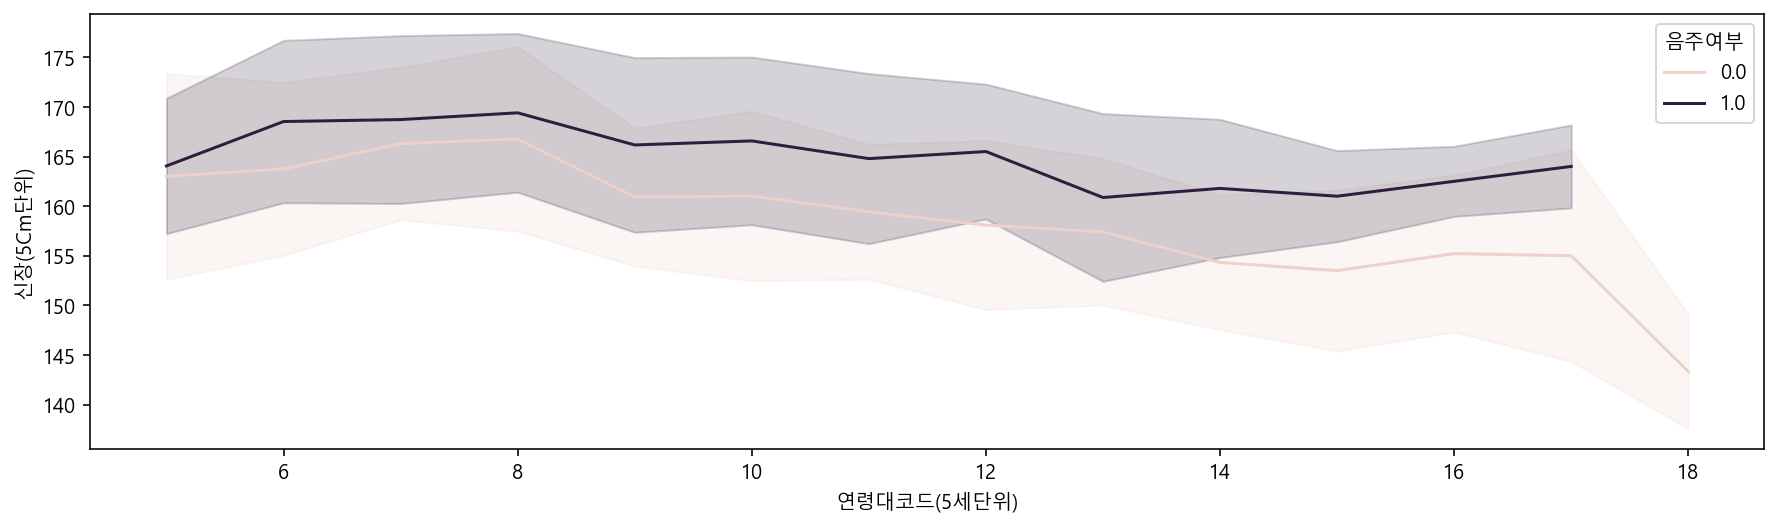

In [67]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

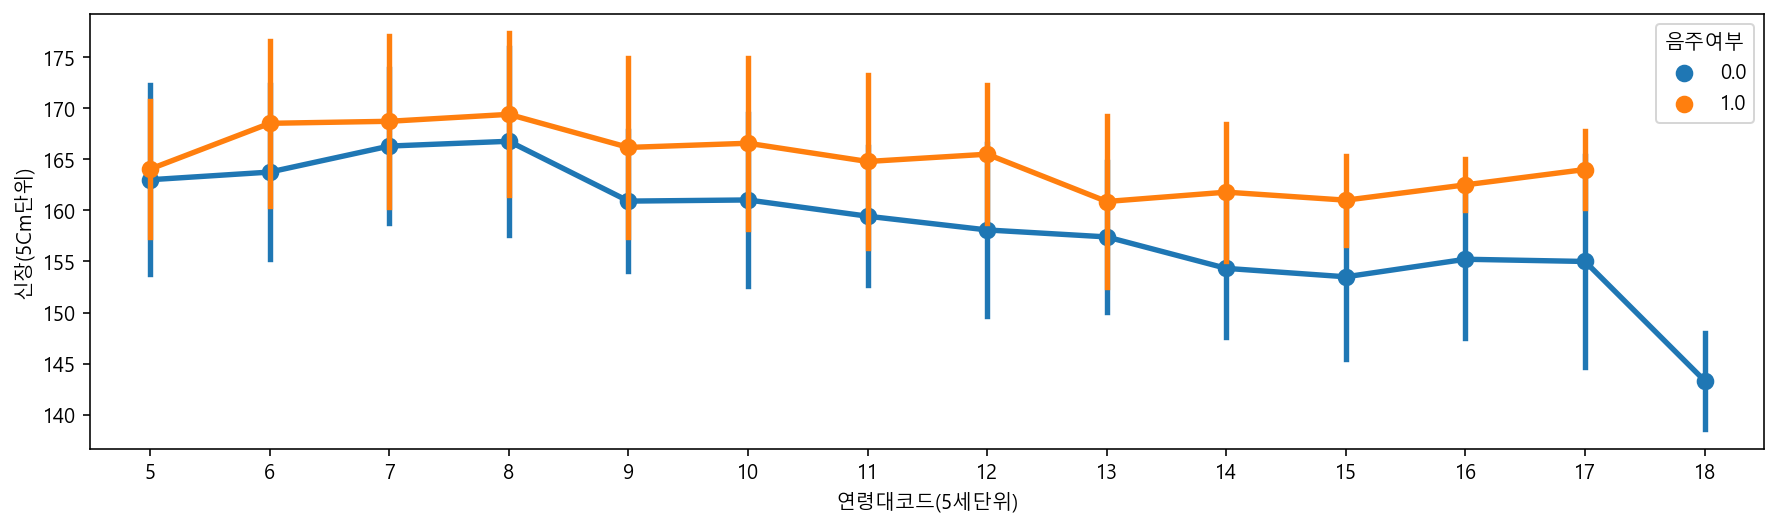

In [68]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

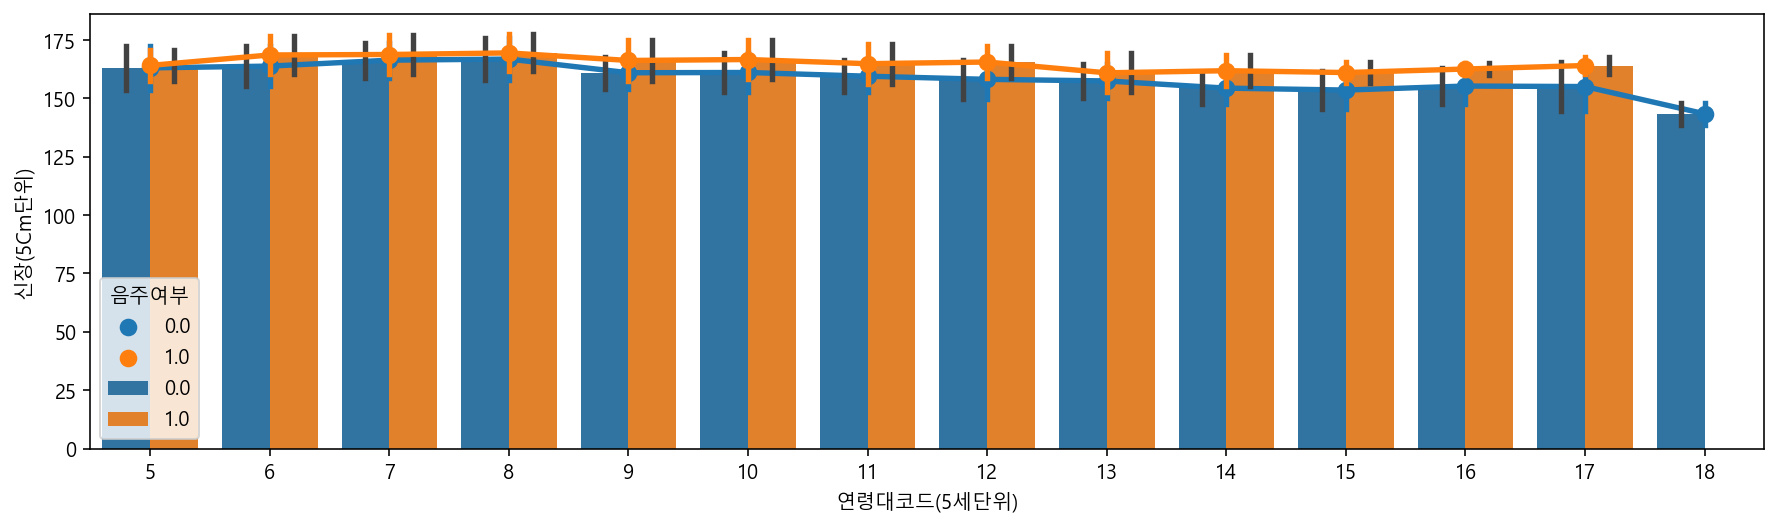

In [69]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
# 두개를 겹쳐서 그릴 수도 있다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

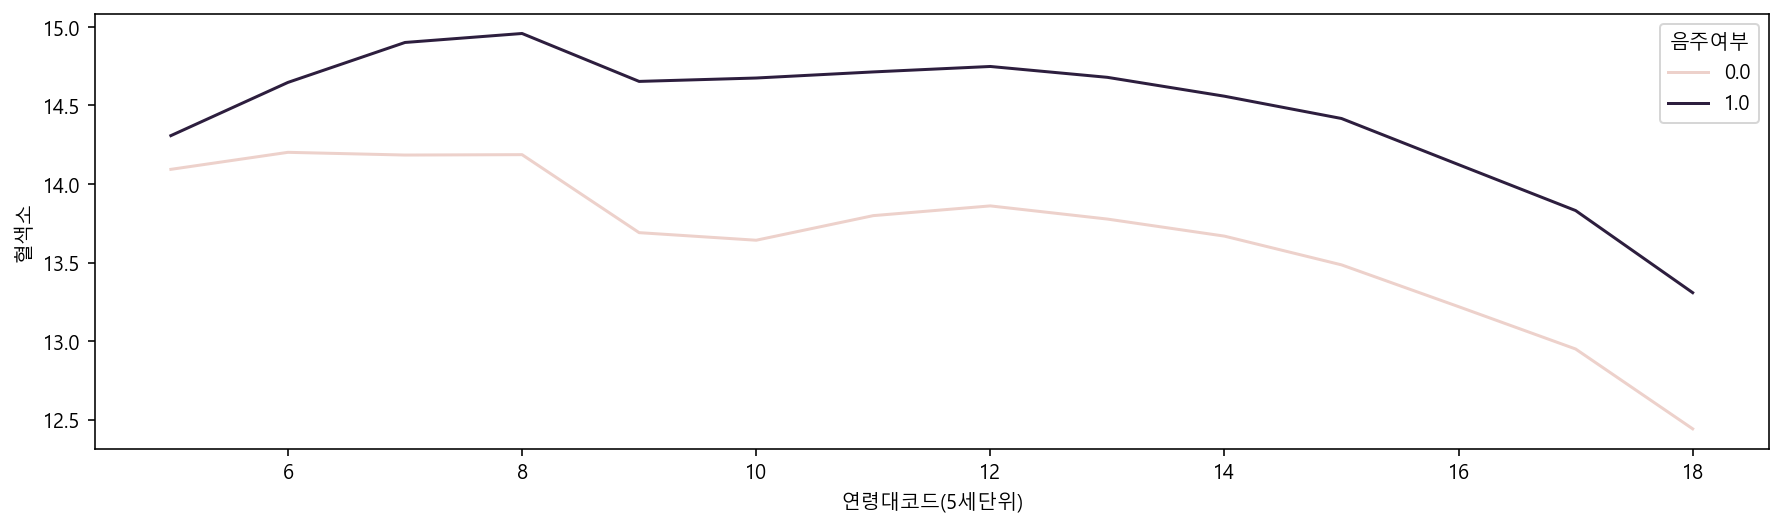

In [70]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

##  boxplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

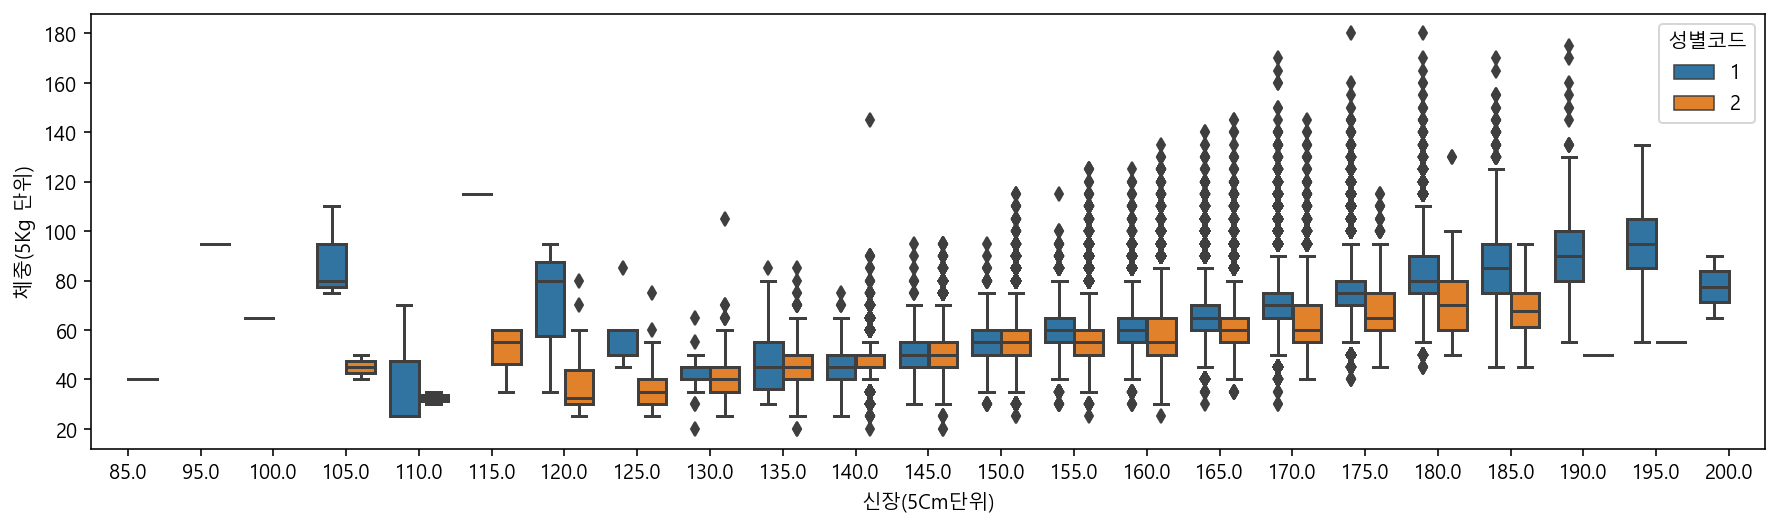

In [73]:
# boxplot으로 신장에 따른 체중을 그리며, 성별코드에 따른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

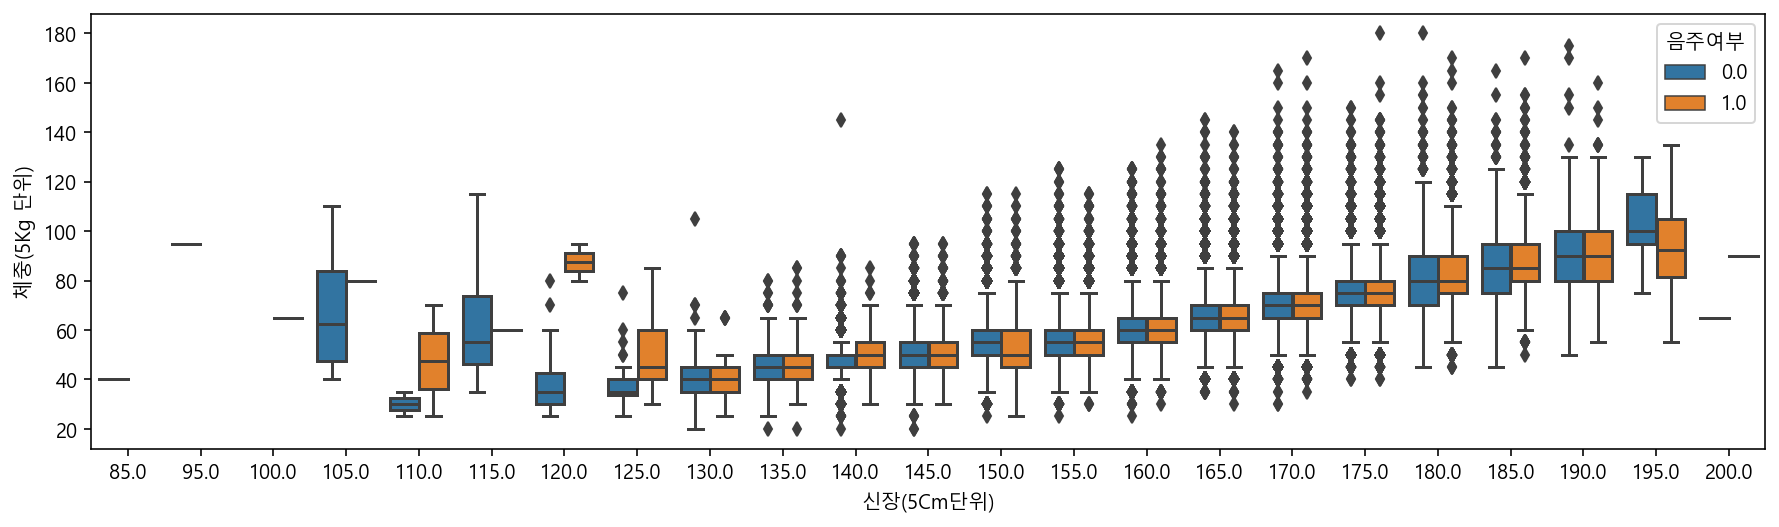

In [74]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

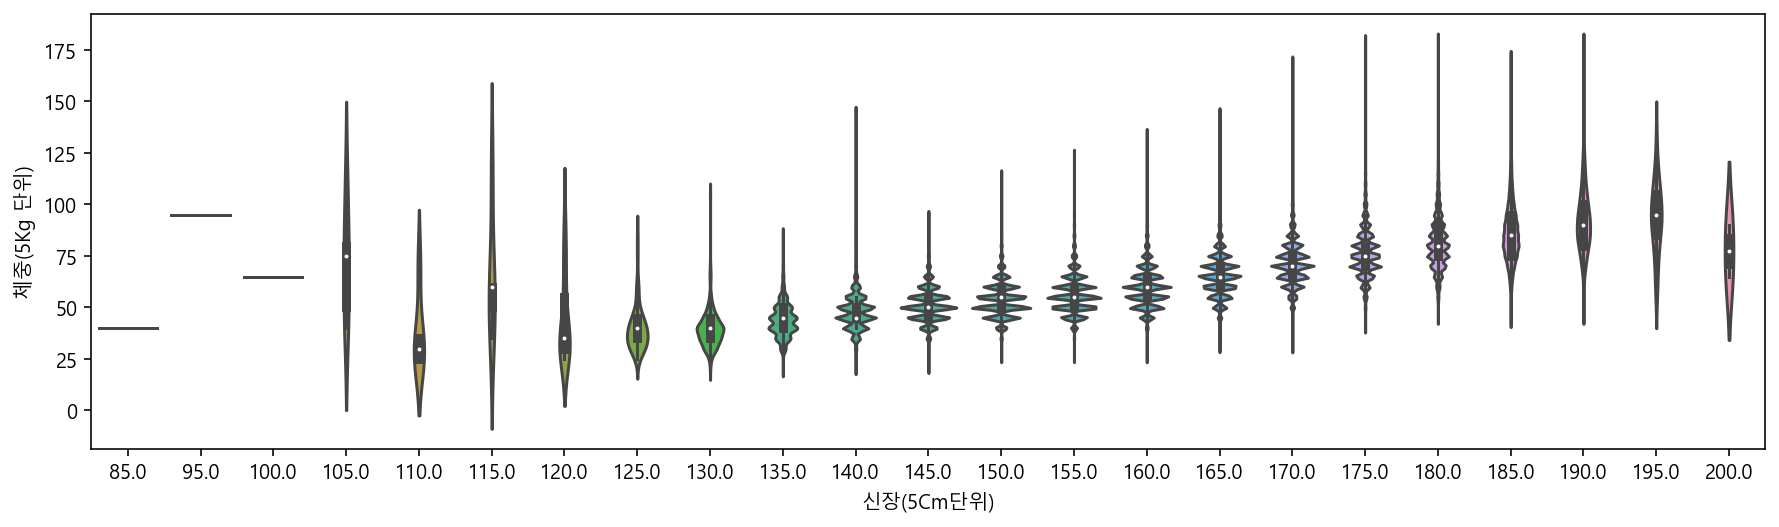

In [76]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

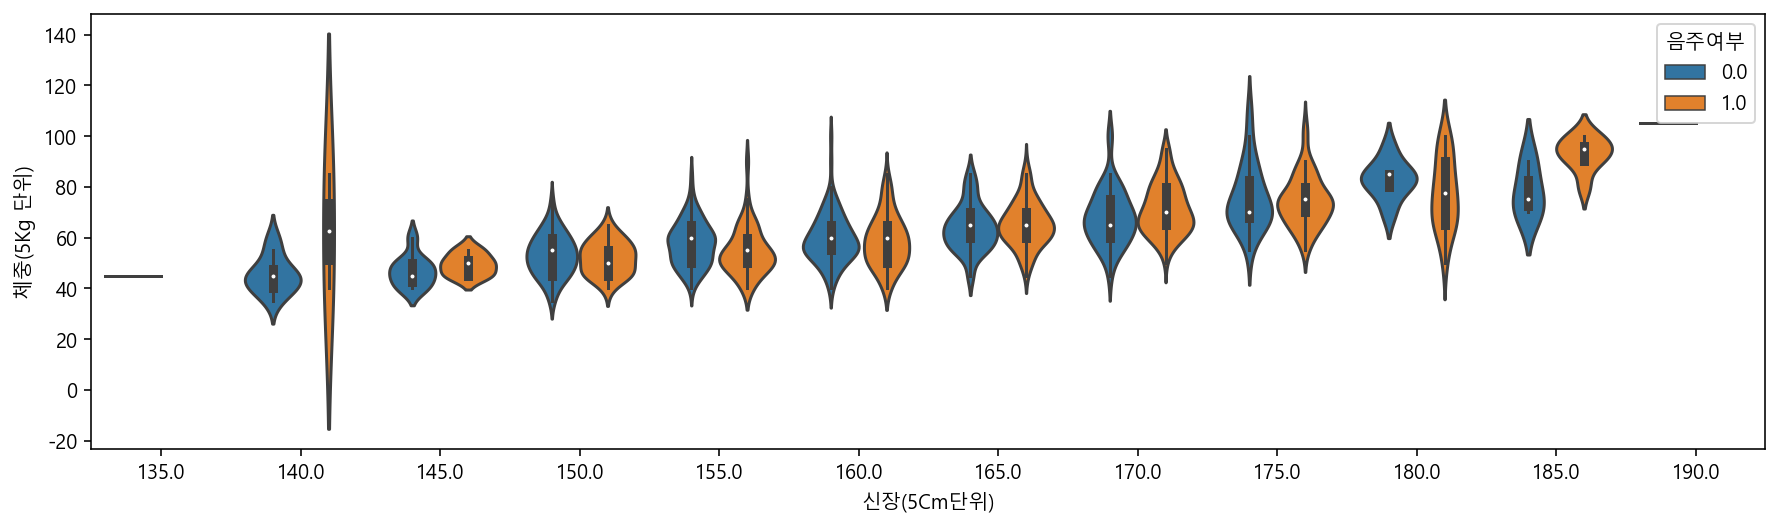

In [78]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

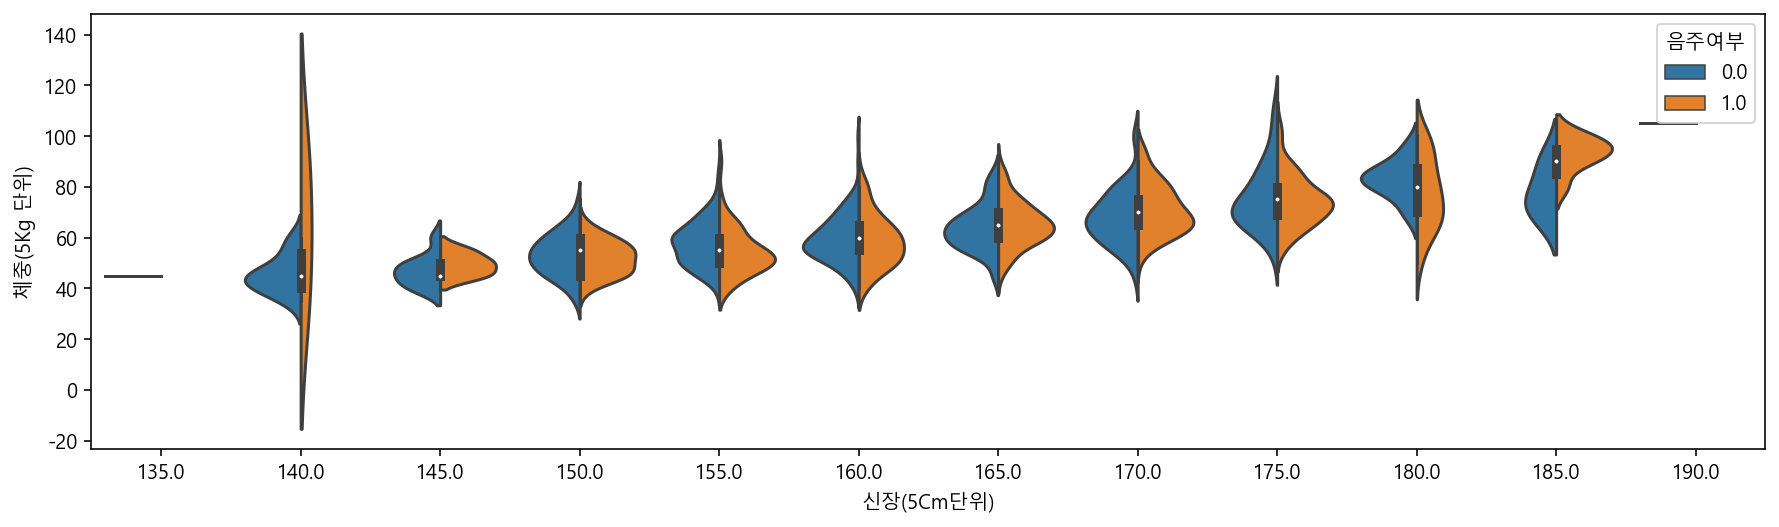

In [79]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)
# split : 두개의 값을 합쳐서 그림

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

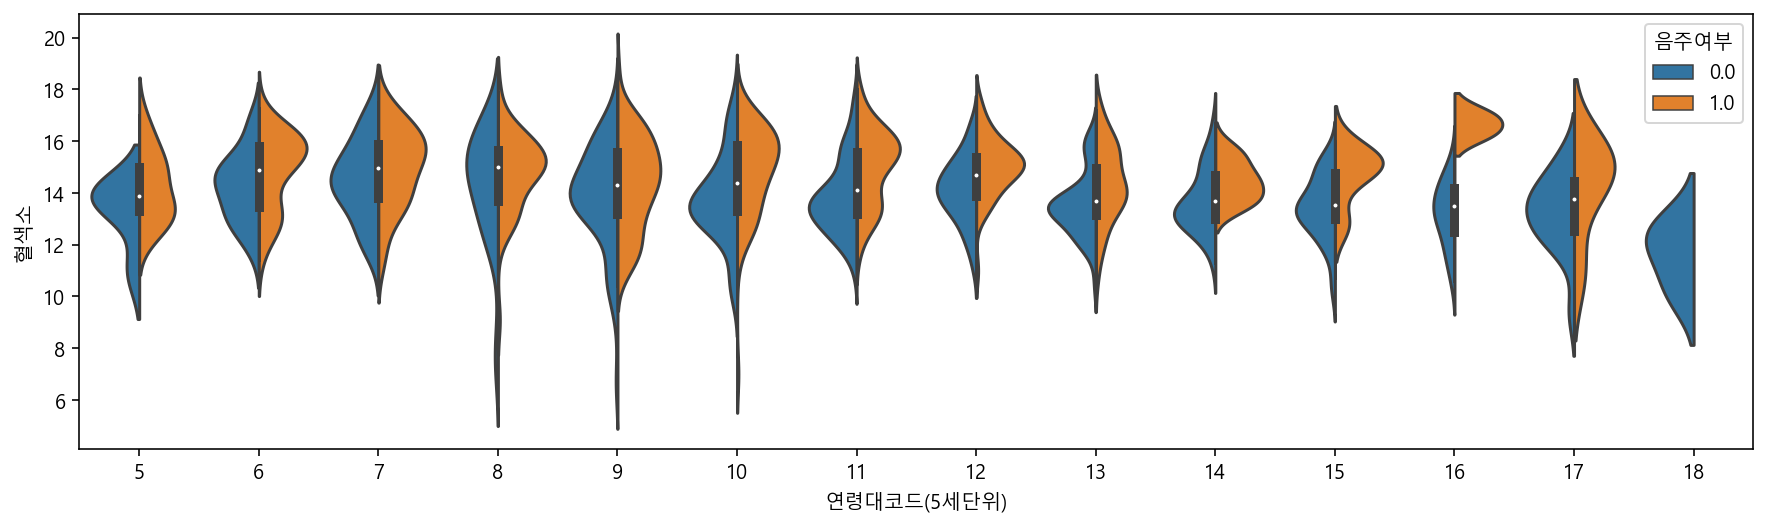

In [80]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## swarm plot
 - 범주형 데이터를 산점도로 시각화하고자 할 대 사용한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.0% of the points cann

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

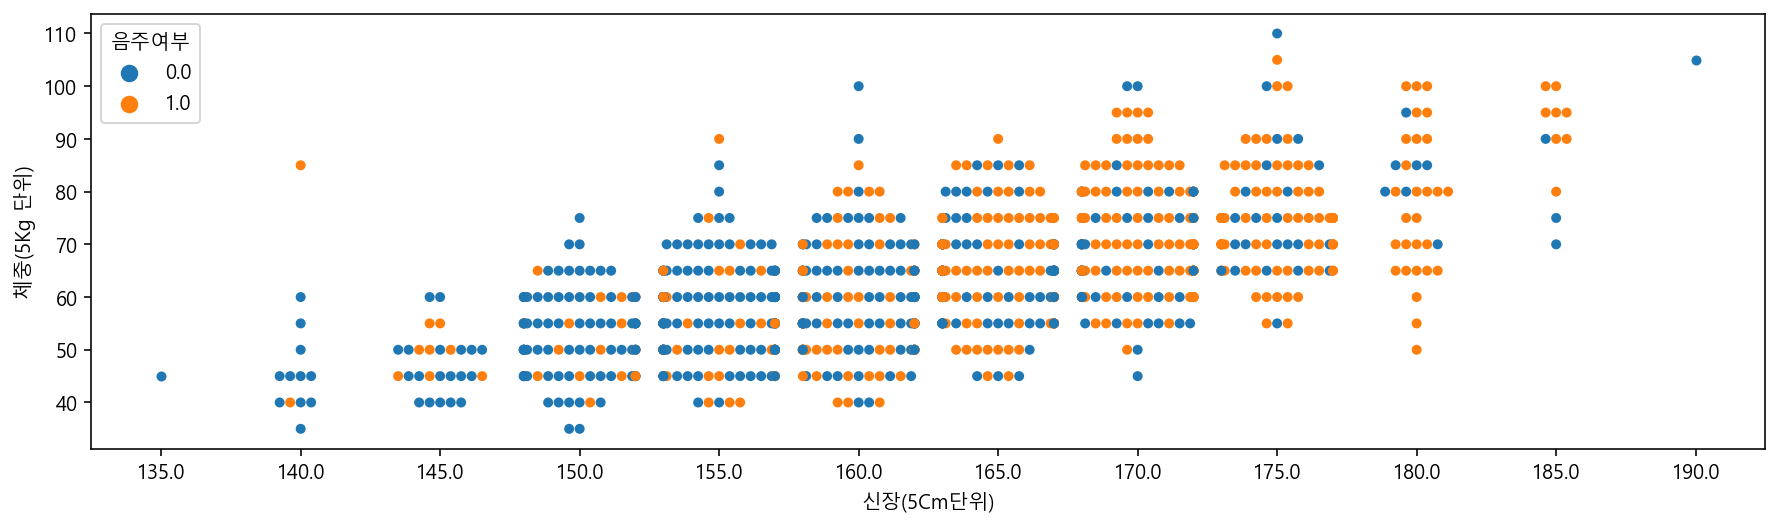

In [88]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

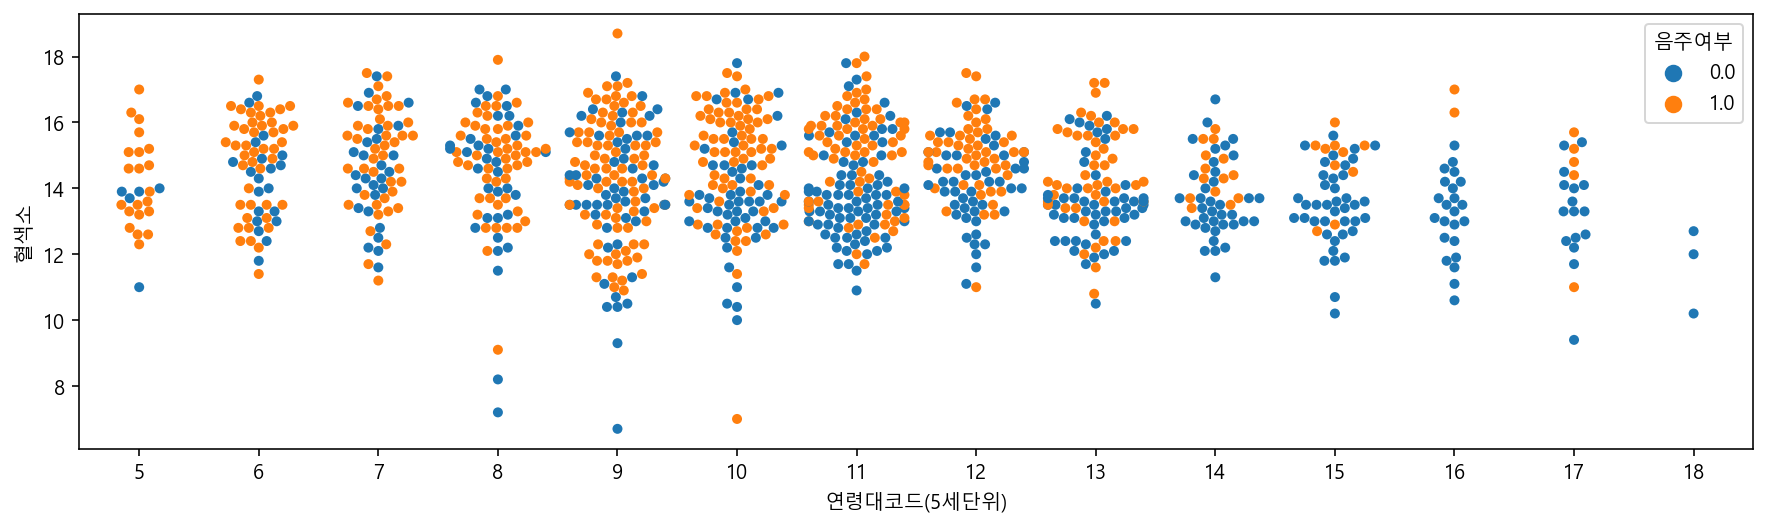

In [89]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

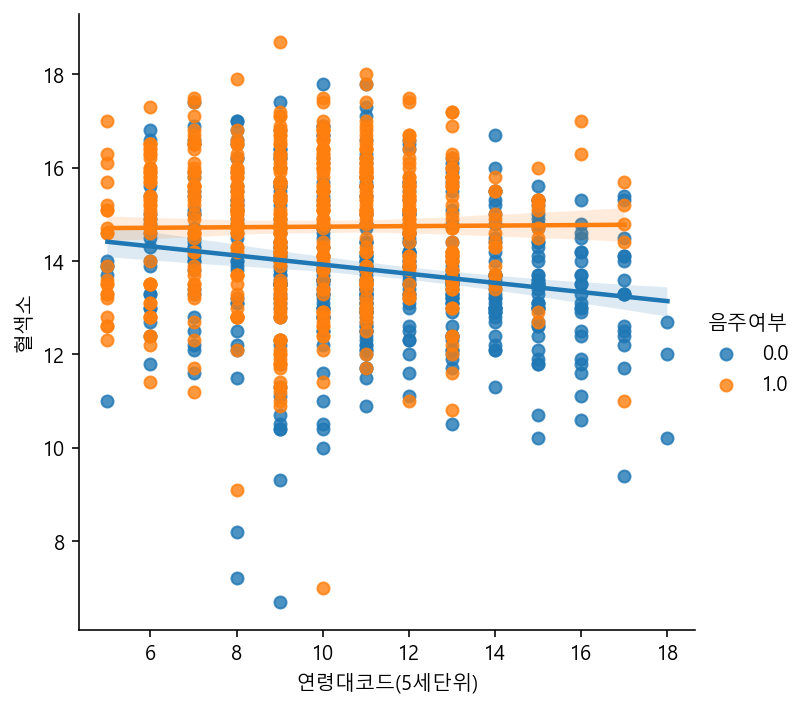

In [93]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")
# 회귀선을 그려서 상관관계를 보여준다.

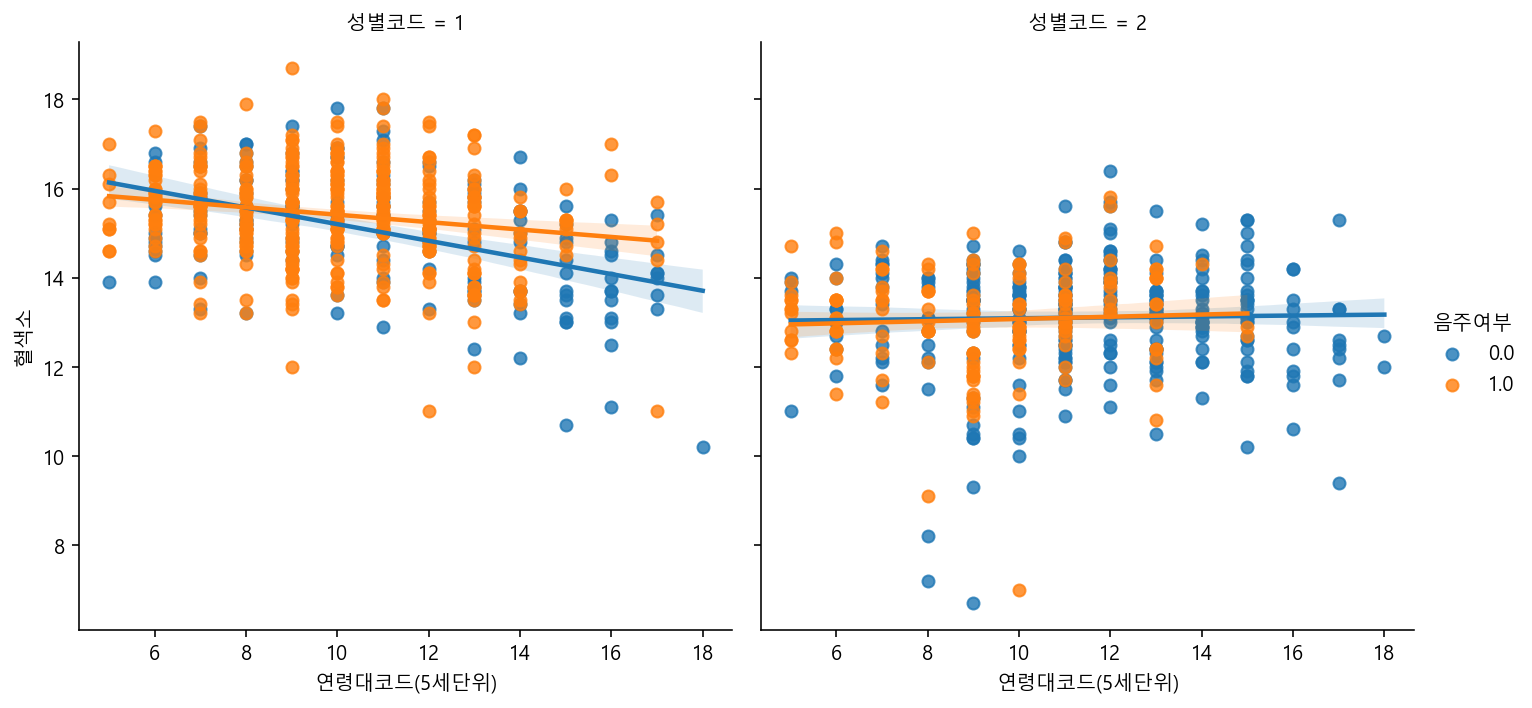

In [94]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")
# 회귀선을 그려서 상관관계를 보여준다.
# col통해서 여러게 나오게 한다. 